# House Price Prediction-EDA

## Importing Necessary Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df=pd.read_csv('HousePrices.csv')

In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [10]:
df.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities LotConfig LandSlope Neighborhood  \
0            Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1            Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2            IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3            IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4            IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 Dwelling_Type HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm          1Fam     2Story            7            5   
1      Feedr       Norm          1Fam     1Story            6            8   
2       Norm       Norm          1Fam     2Story            7            5   
3       Norm       Norm          1Fam     2Story            7            5   
4       Norm       Norm          1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ 

In [11]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [12]:
df.shape

(2073, 81)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [14]:
df.drop('Id',axis=1,inplace=True)

## EDA

### Analysis on Sale Price

In [15]:
df['Property_Sale_Price'].describe()

count      2073.000000
mean     180967.284129
std       78666.411112
min       34900.000000
25%      130000.000000
50%      163990.000000
75%      214000.000000
max      755000.000000
Name: Property_Sale_Price, dtype: float64

Observations:

    1.Minimum sale price = $ 34900
    
    2.Maximum sale price = $ 755000
    
    3.Average sale price = $ 180967.28

<AxesSubplot: xlabel='Property_Sale_Price', ylabel='Density'>

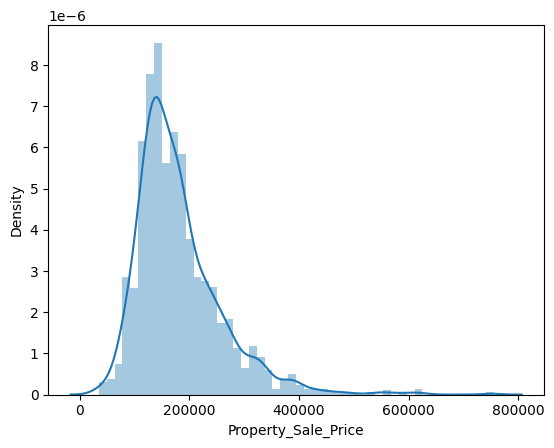

In [16]:
sns.distplot(df['Property_Sale_Price'])

In [17]:
print("Skewness:",df['Property_Sale_Price'].skew())
print("Kurtosis:",df['Property_Sale_Price'].kurt())

Skewness: 1.8421232559932466
Kurtosis: 6.262967208795123


Text(0.5, 1.0, 'Q-Q Plot')

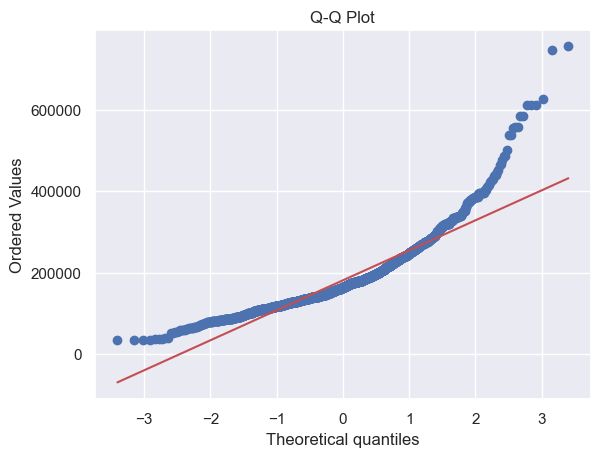

In [33]:
stats.probplot(df['Property_Sale_Price'], plot=plt)
plt.title('Q-Q Plot')

Observations:

    1.Distribution is Positively Skewed
    
    2.With Skewness of 1.84 and Kurtosis of 6.26

### Sale price relationship with numerical columns

In [18]:
numerical_column = df.select_dtypes(include=['int', 'float'])
categorical_column = df.select_dtypes(include=['object'])

#### Changing some numerical variables that are really categorical

In [34]:
cols4=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
       'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

for i in cols4:
    df[i] = df[i].astype(str)

In [35]:
numerical_column1 = df.select_dtypes(include=['int', 'float'])
categorical_column1 = df.select_dtypes(include=['object'])

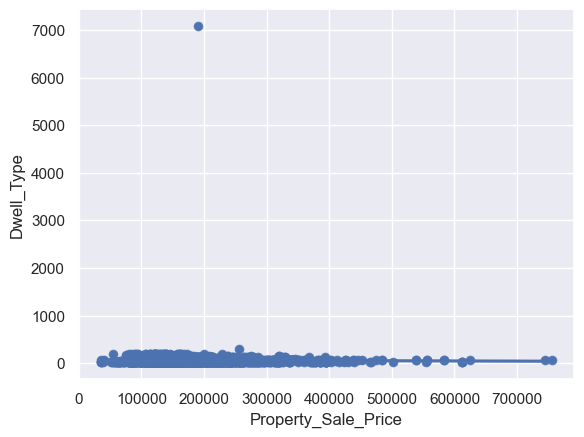

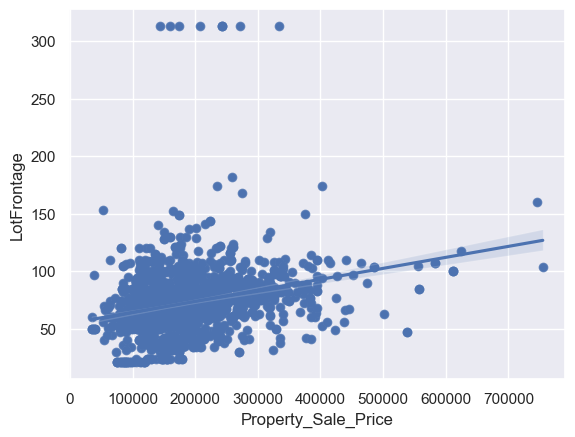

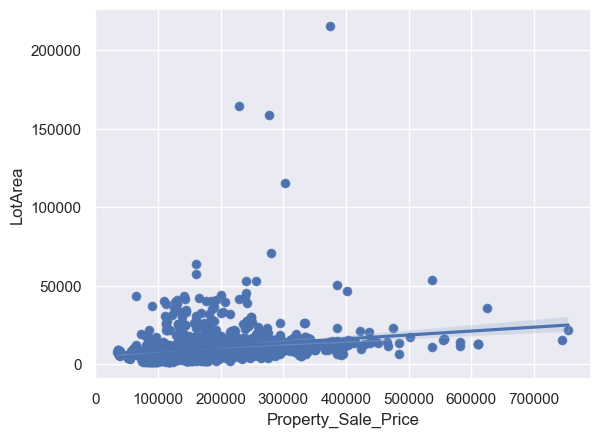

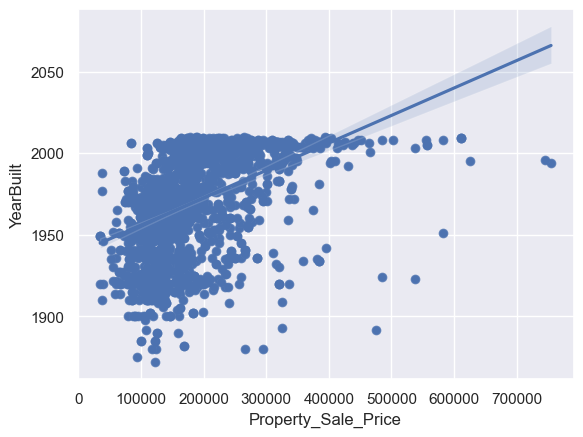

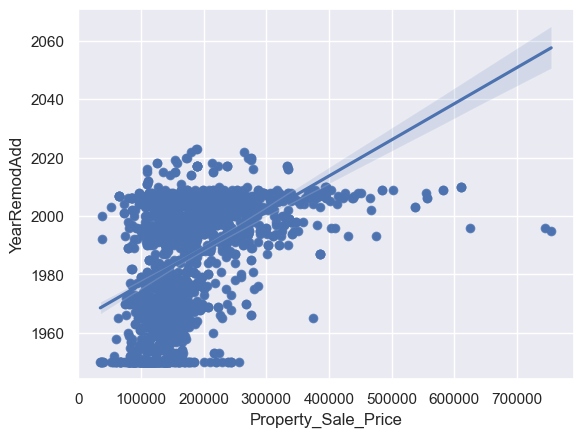

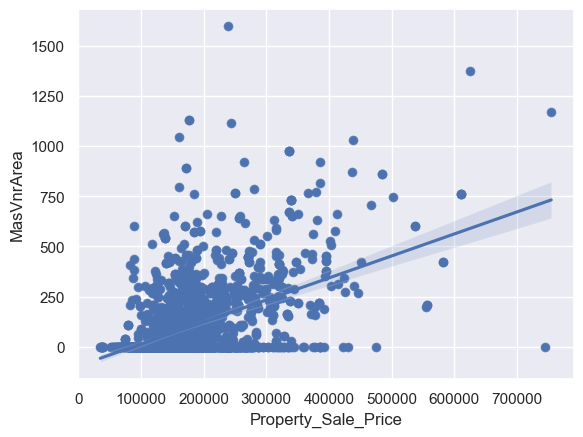

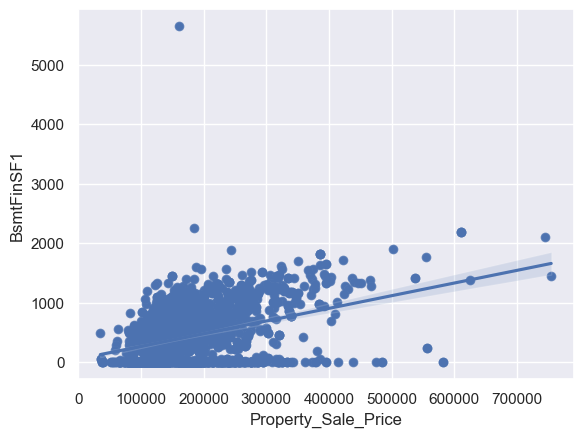

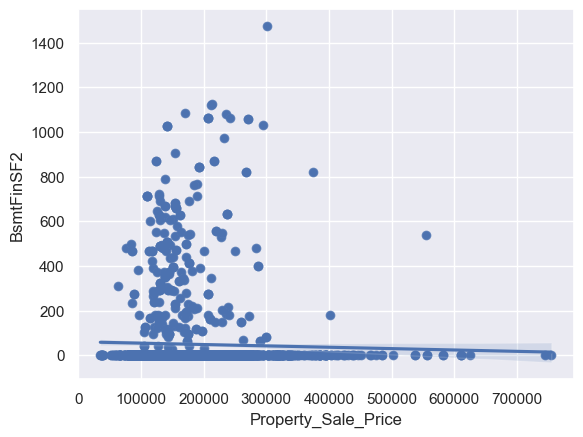

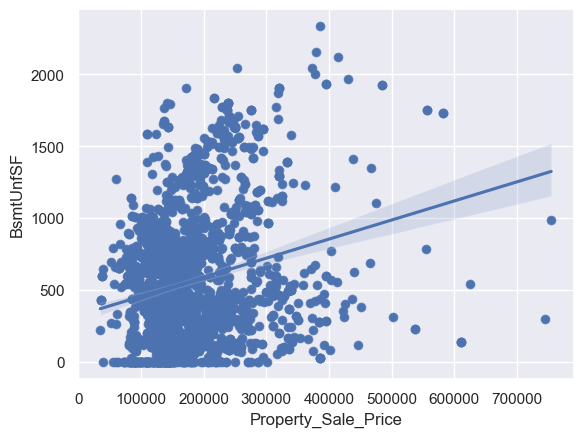

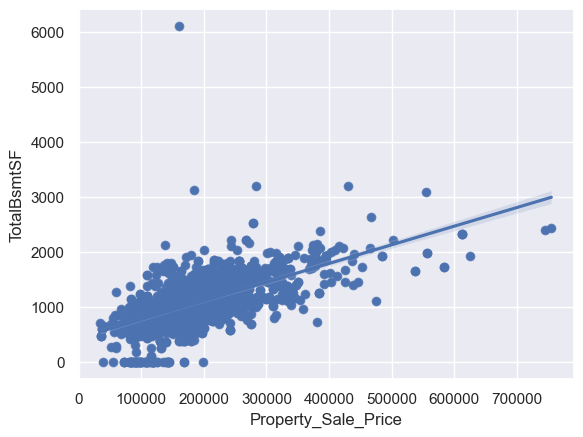

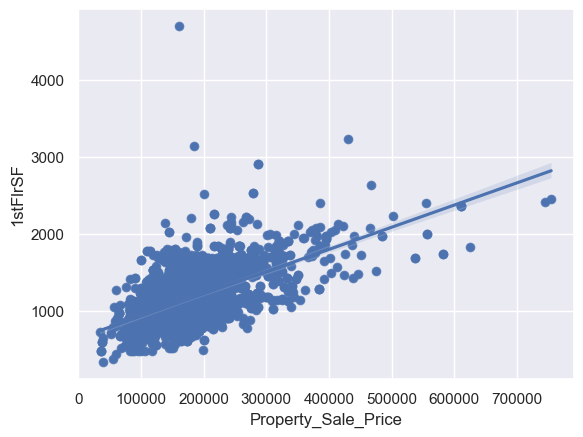

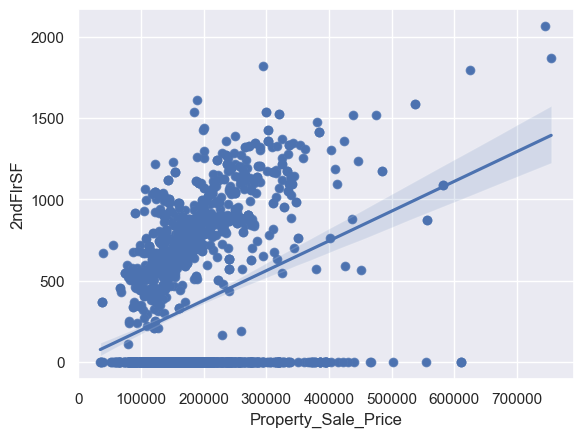

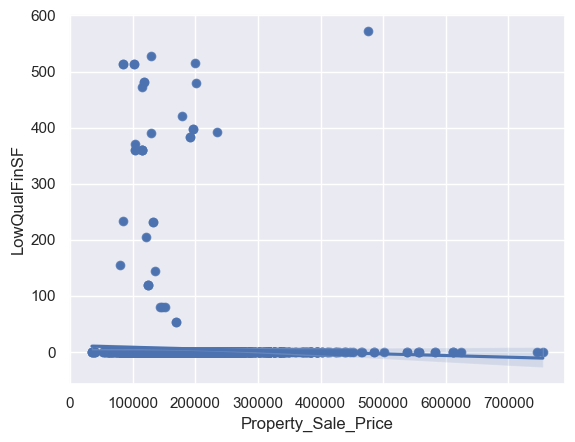

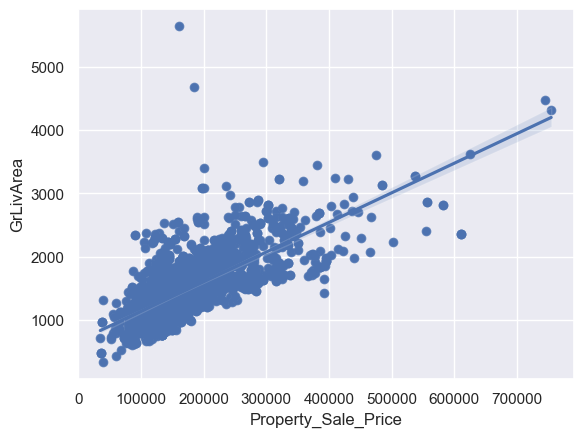

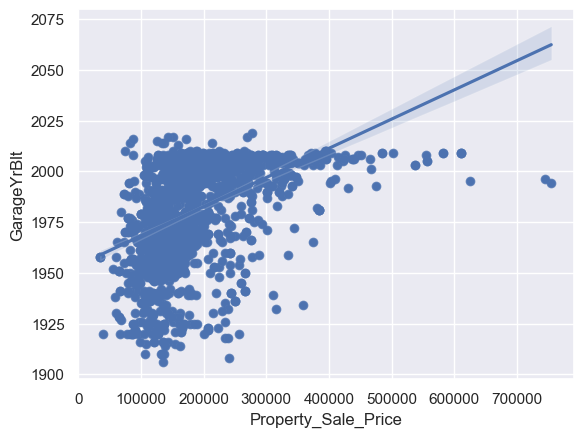

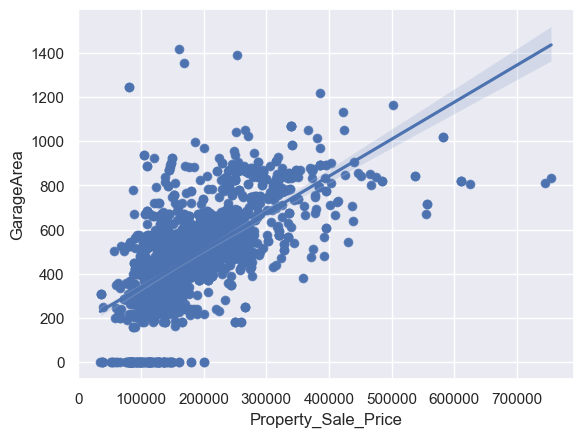

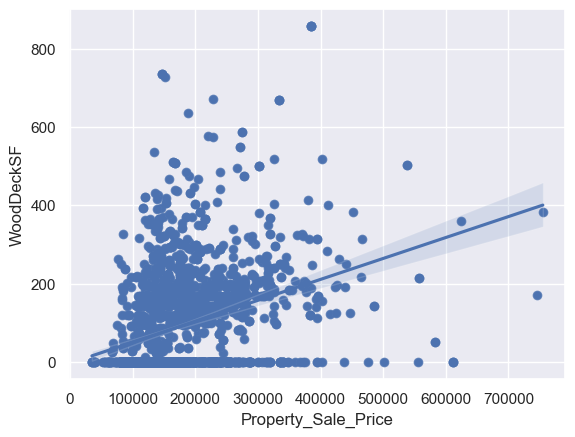

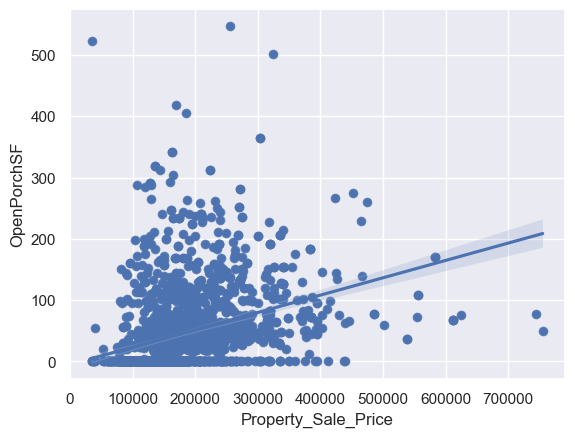

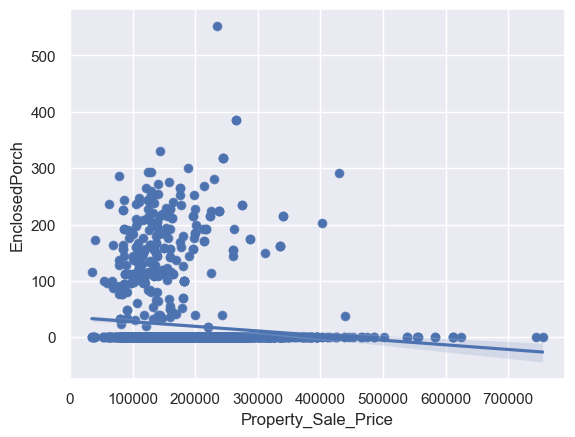

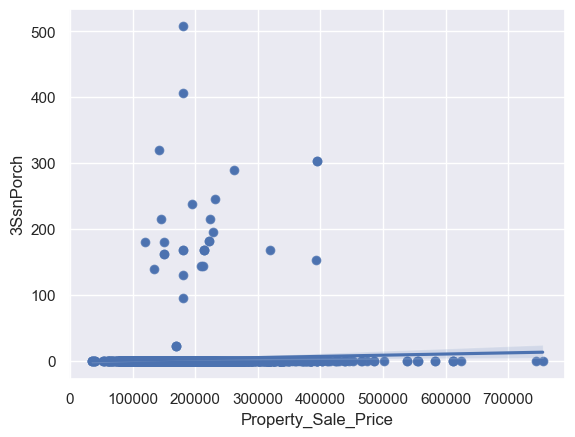

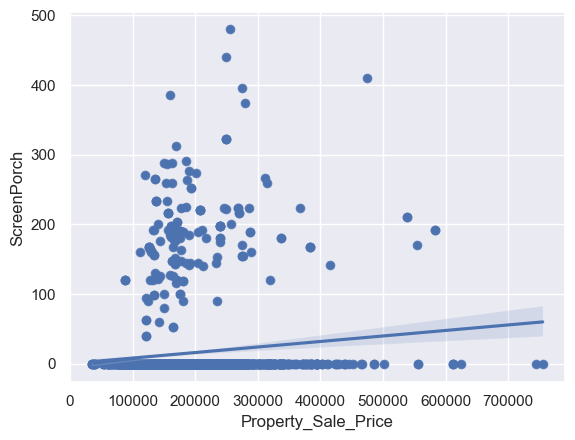

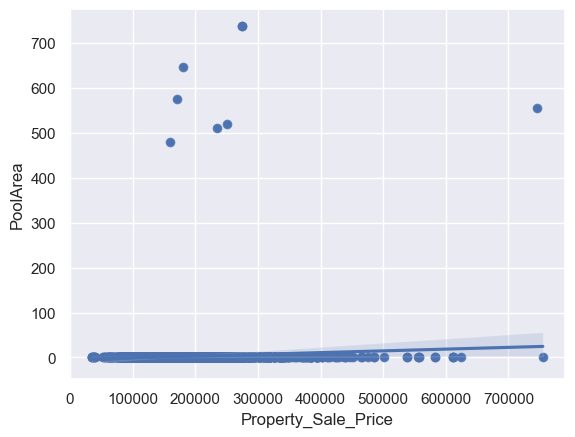

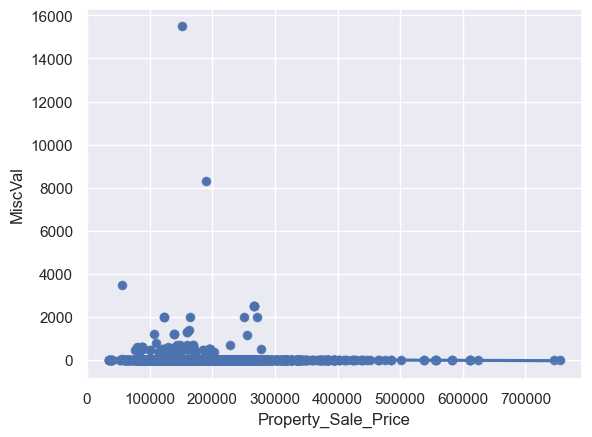

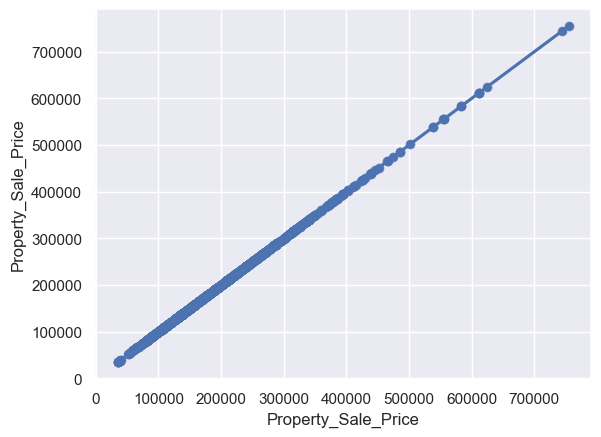

In [36]:
for i in numerical_column1.columns:
    sns.scatterplot(x='Property_Sale_Price',y=i,data=df)
    sns.regplot(x='Property_Sale_Price',y=i,data=df)
    plt.show()

Observations:

    1.Above Plots will be helpful to determine(understand) which predictor variable(numerical variable) has a linear relationship with response variable
    
    2.Response variable(Sale Price) has a linear relationship with predictor variables like 
    LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
    
    3.Linear relationships are positive, which means that as one variable increases, the other also increases

### Sale price relationship with categorical columns

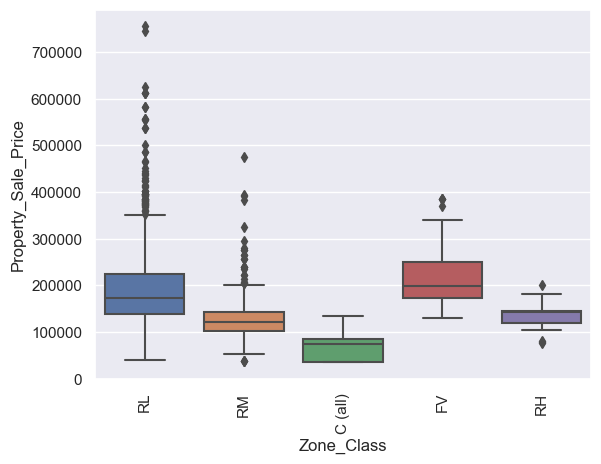

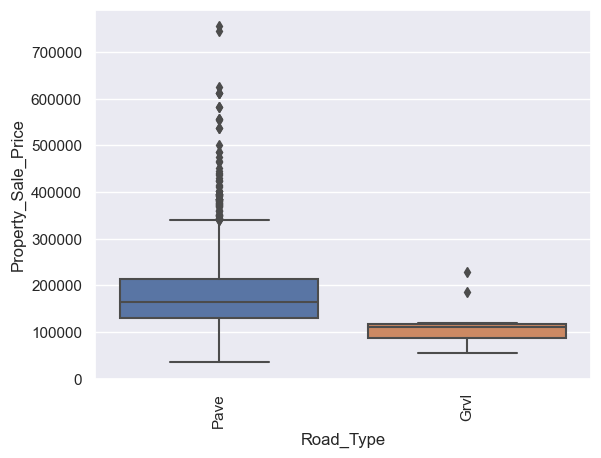

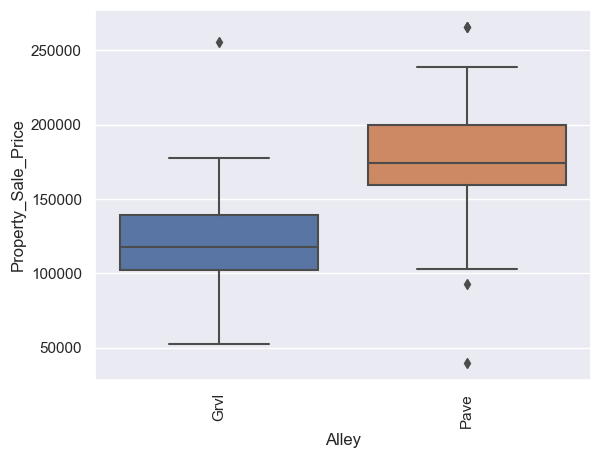

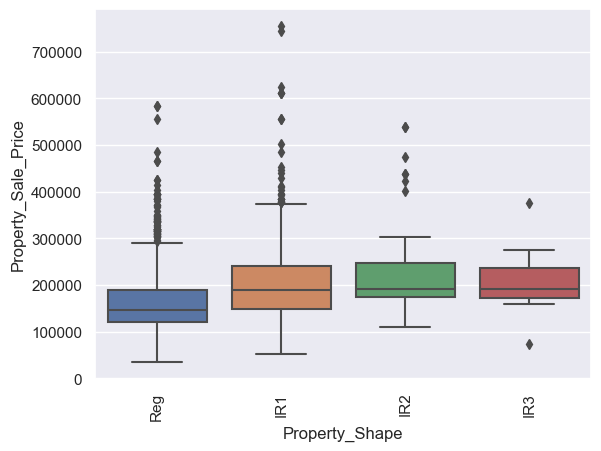

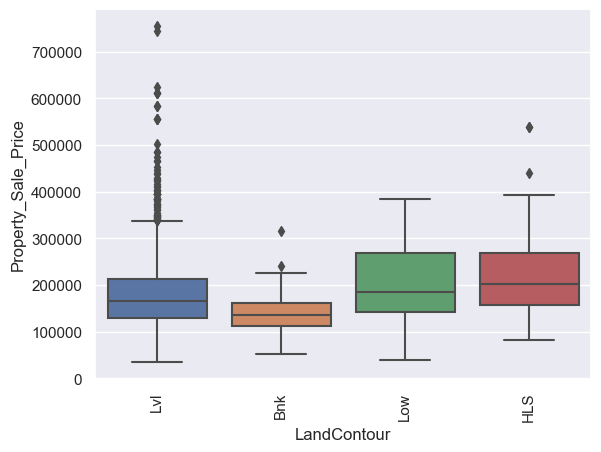

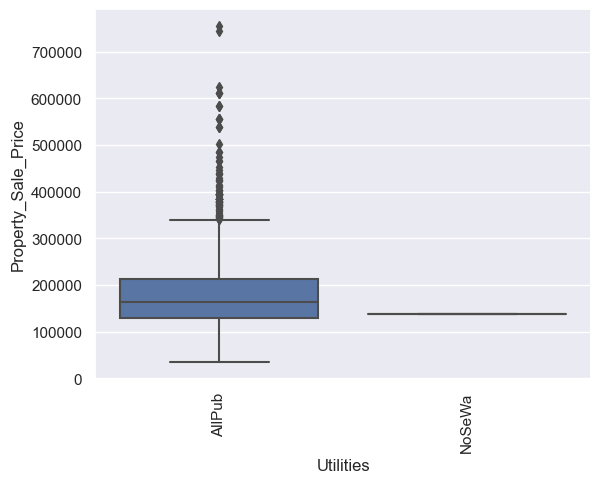

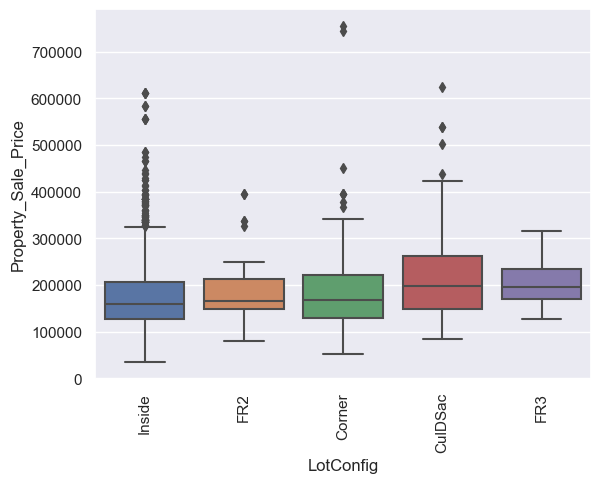

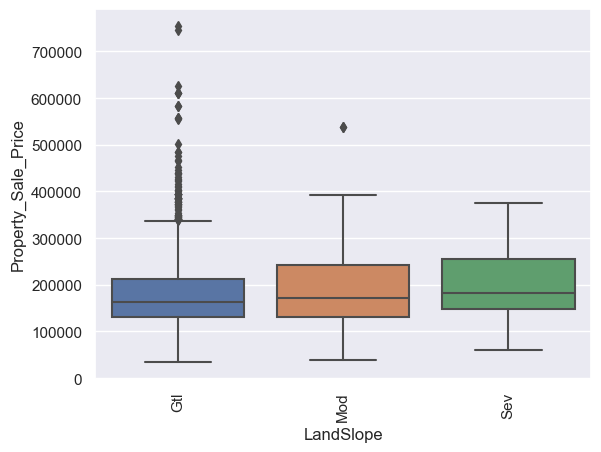

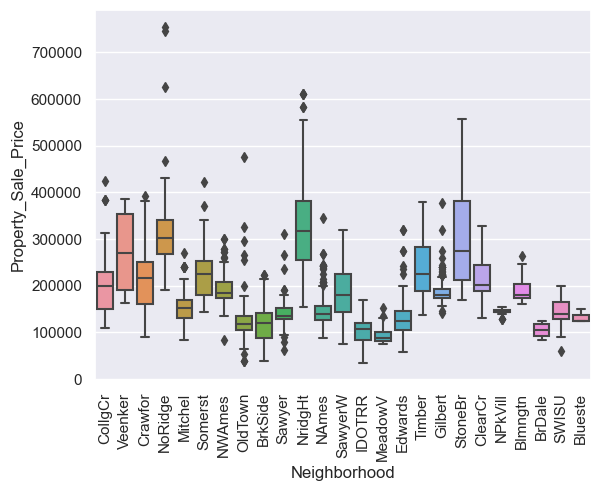

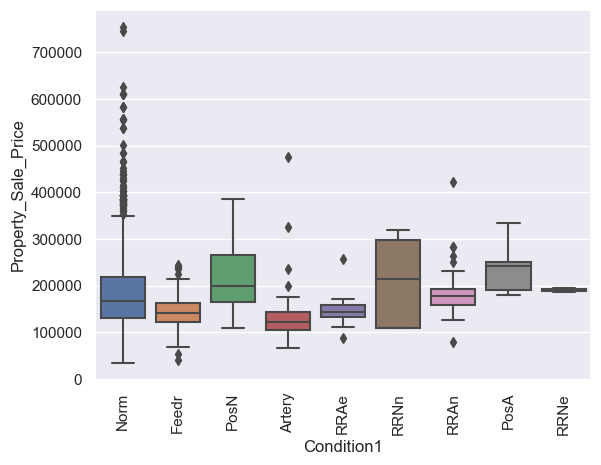

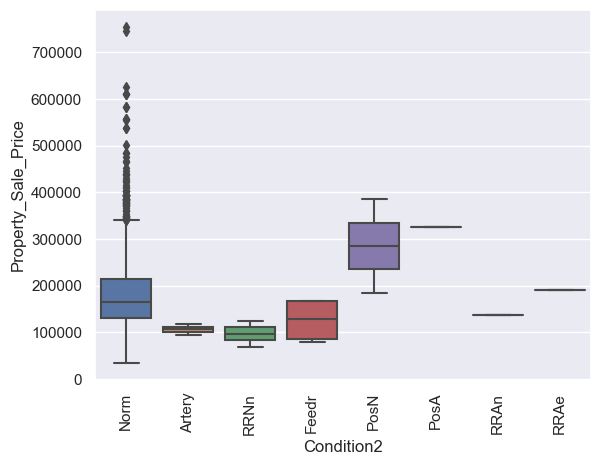

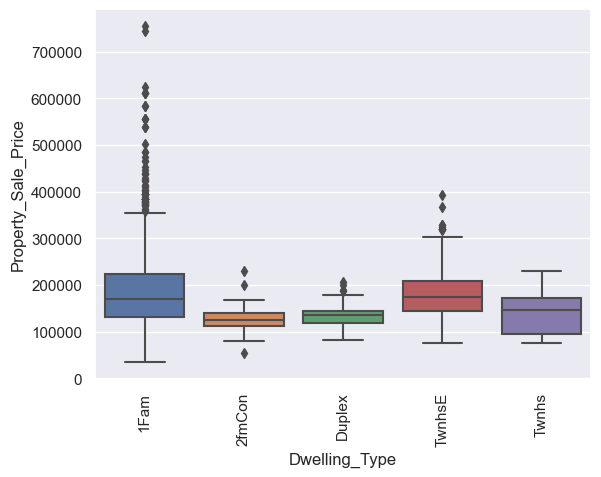

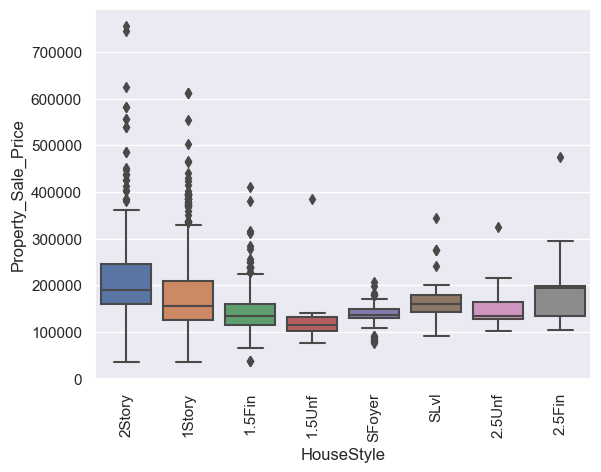

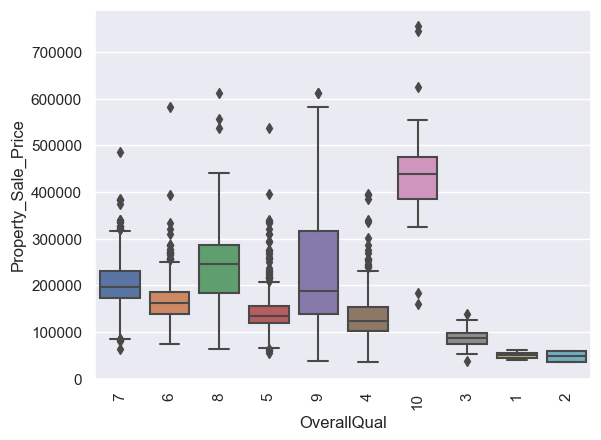

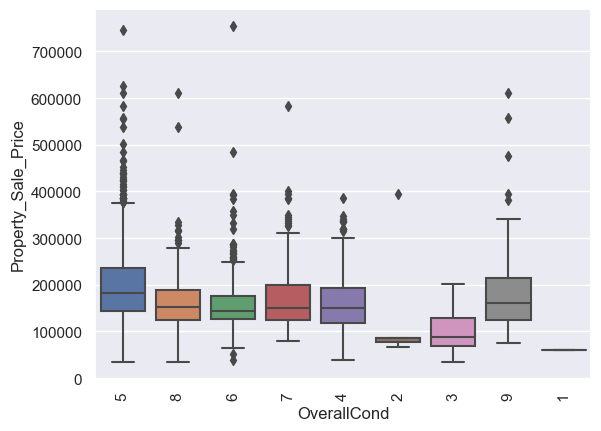

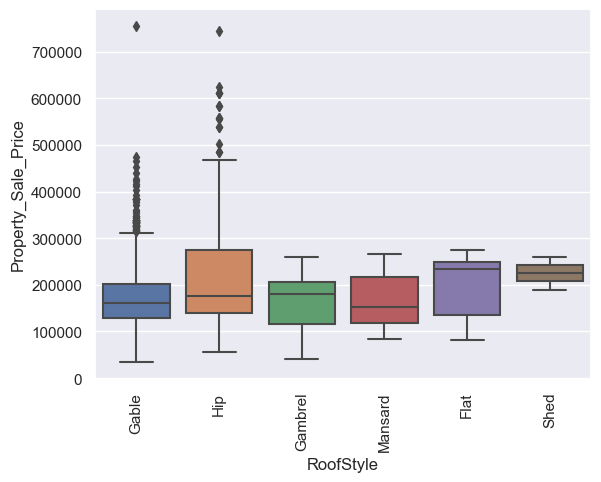

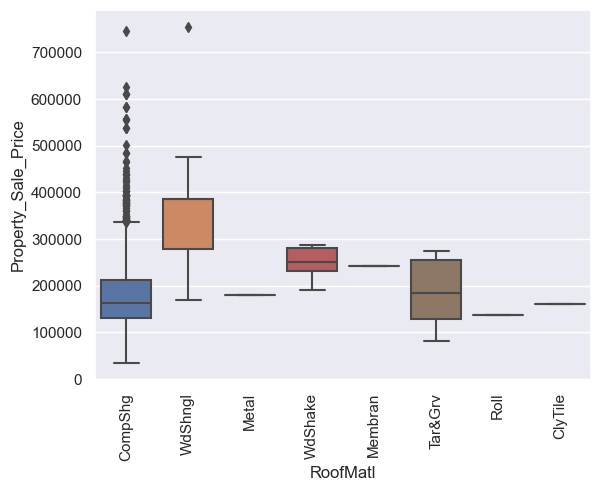

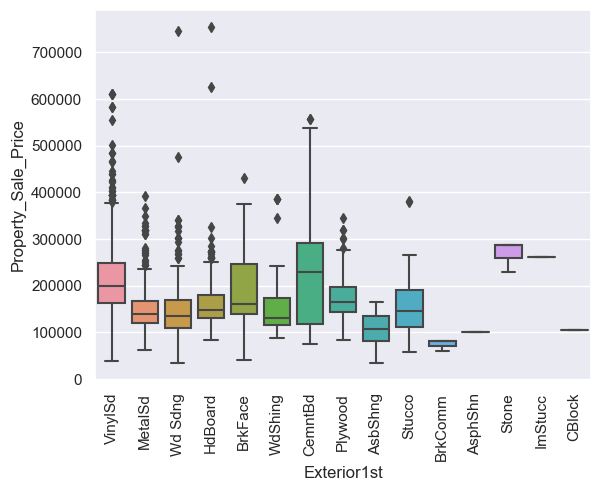

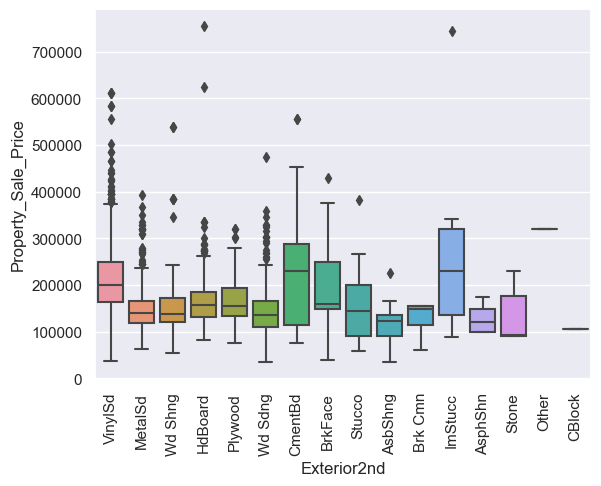

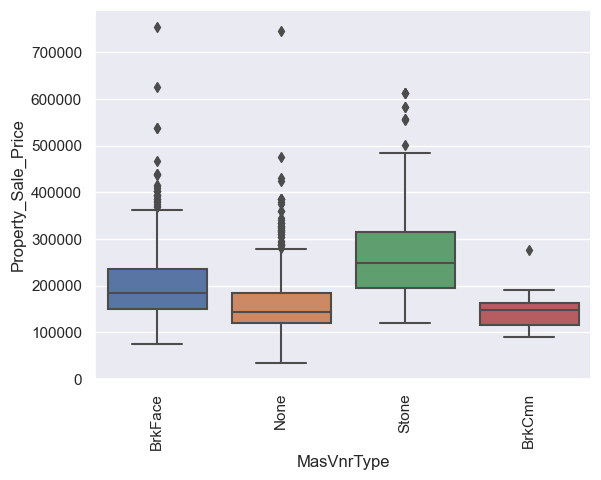

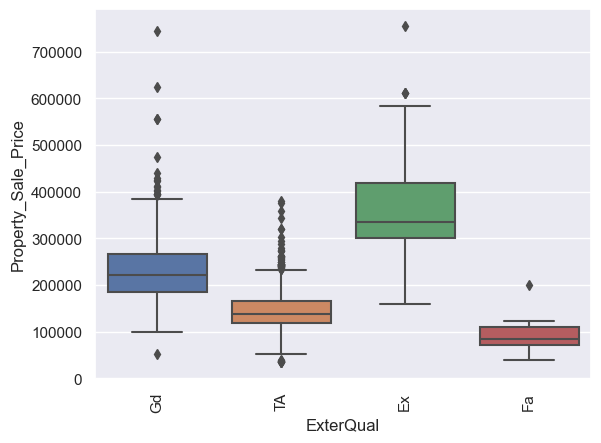

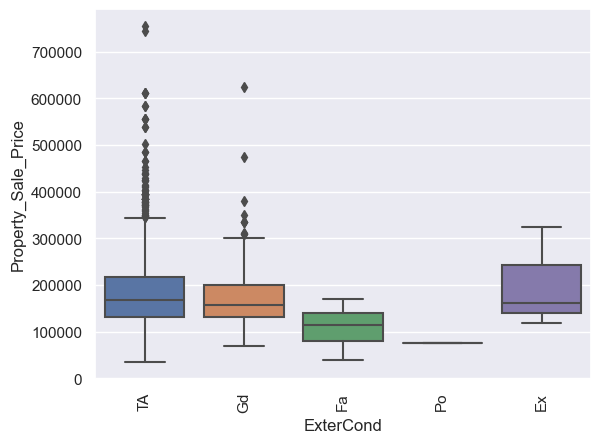

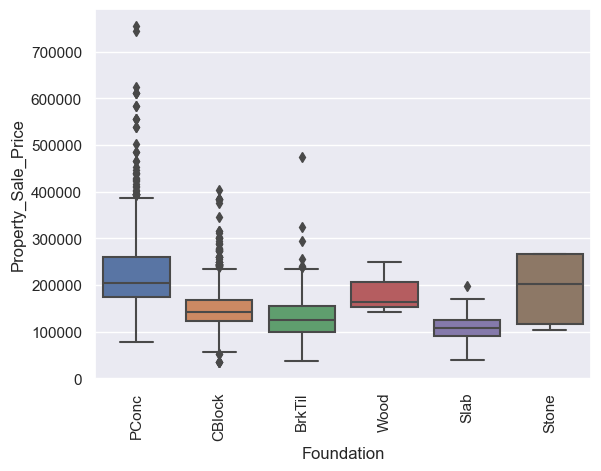

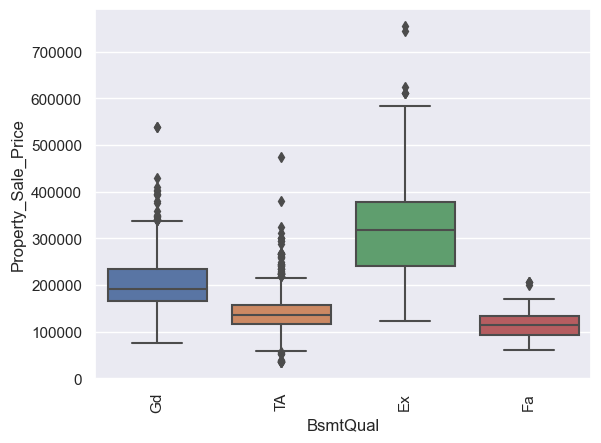

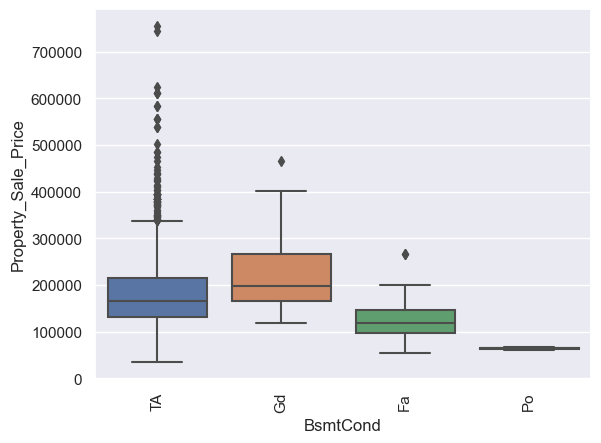

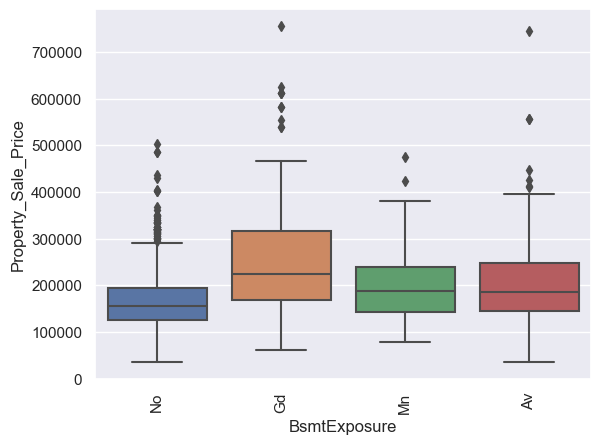

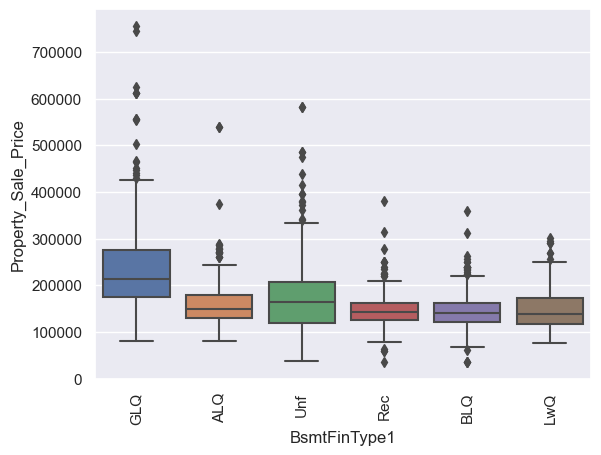

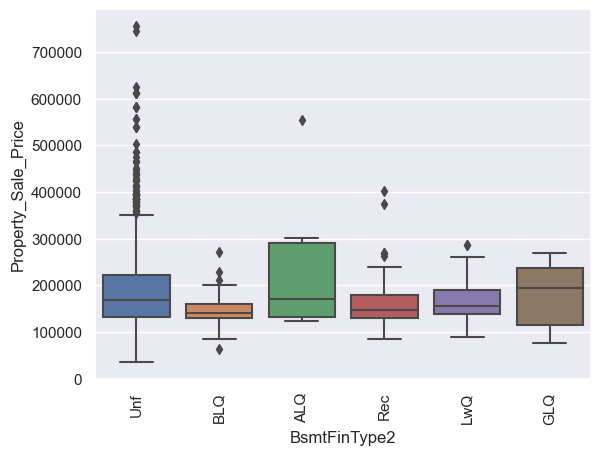

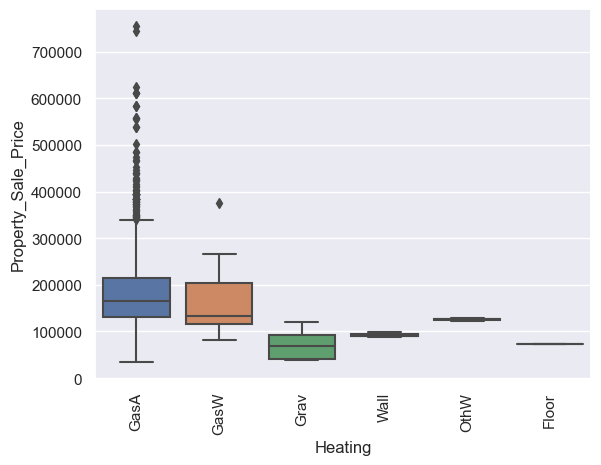

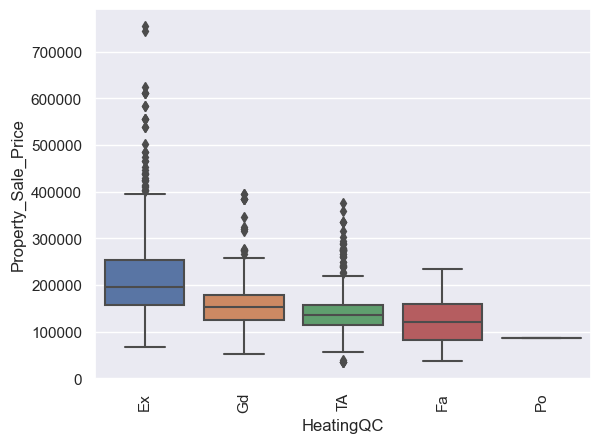

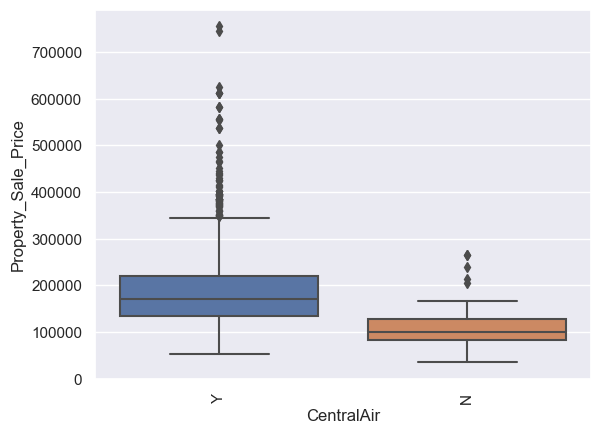

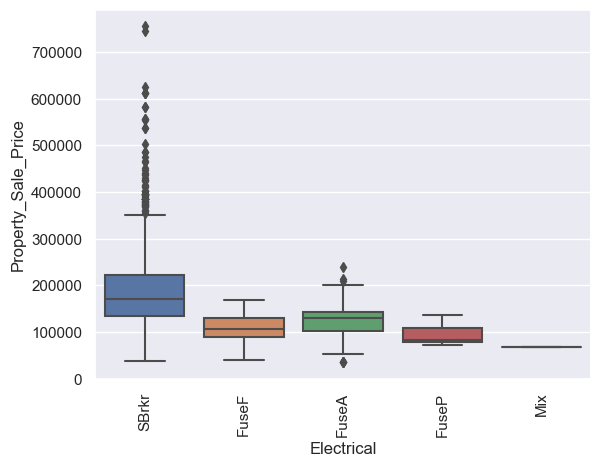

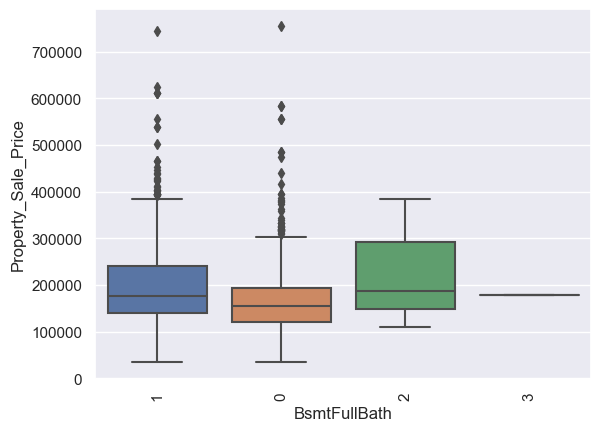

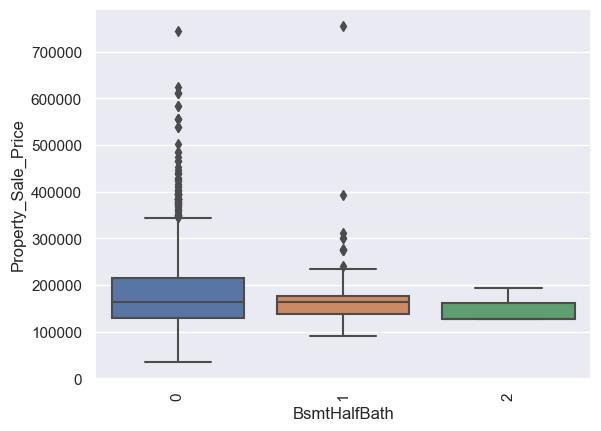

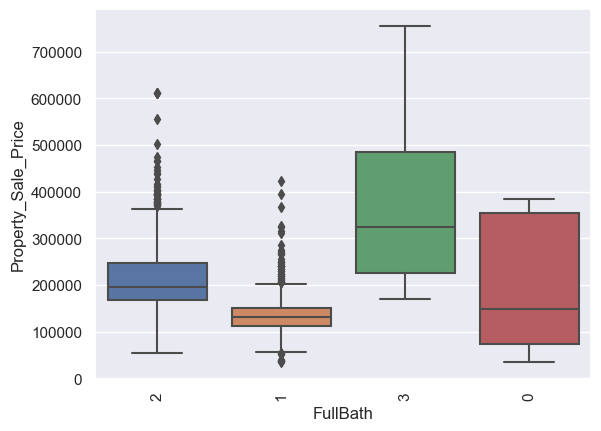

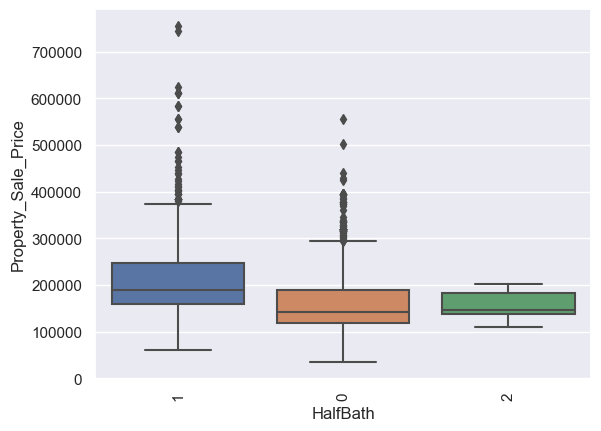

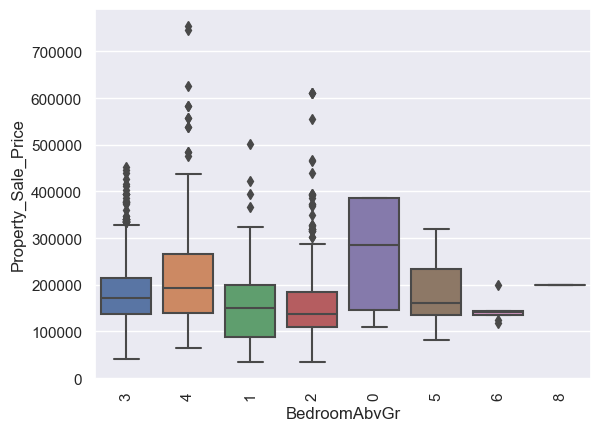

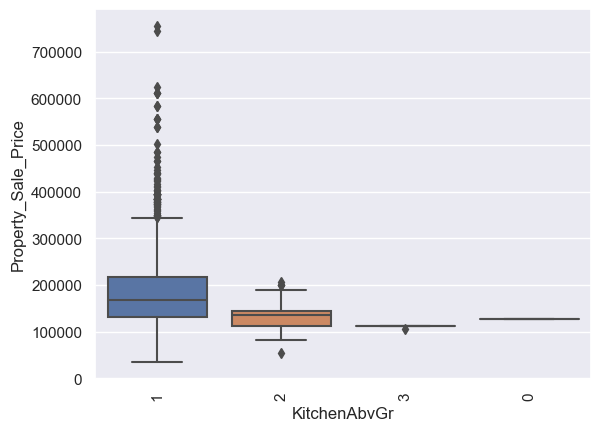

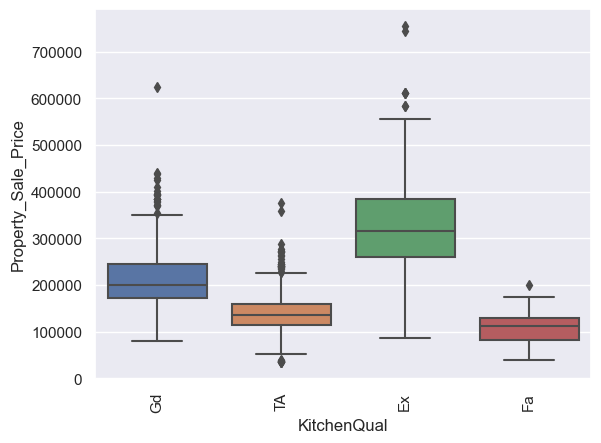

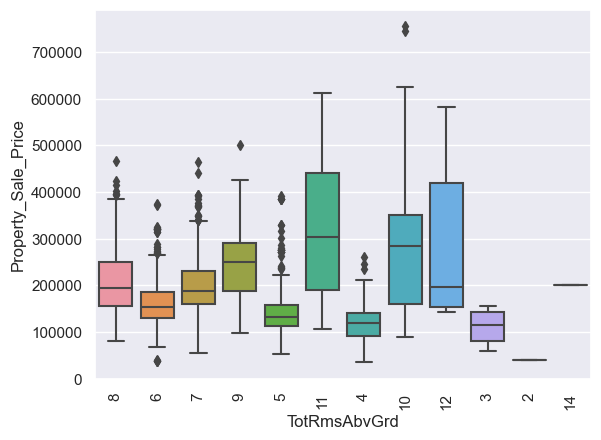

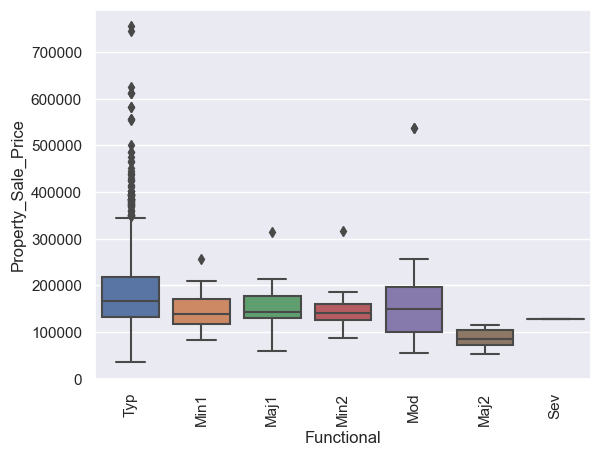

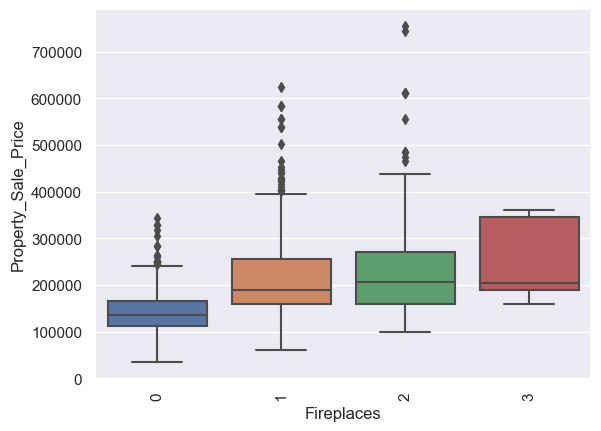

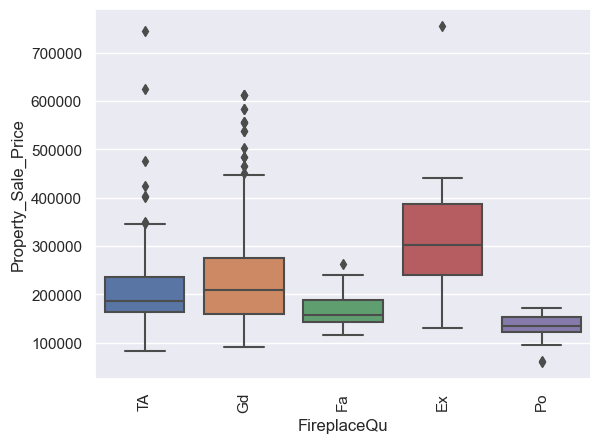

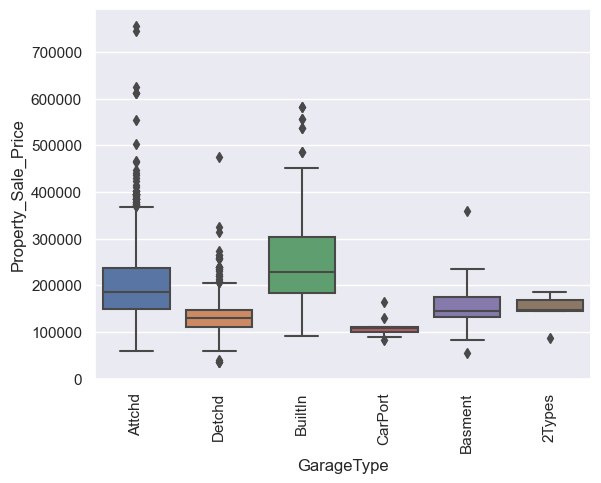

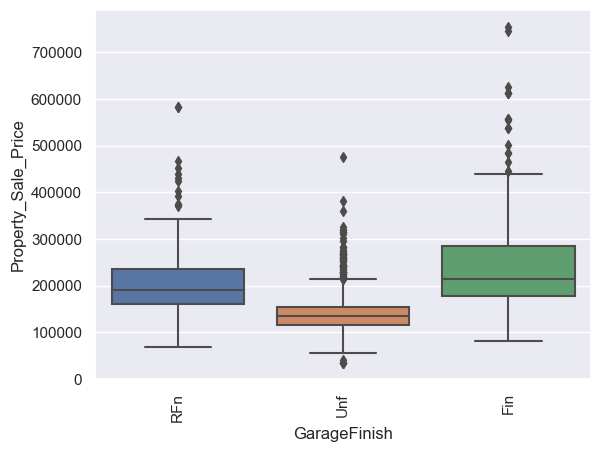

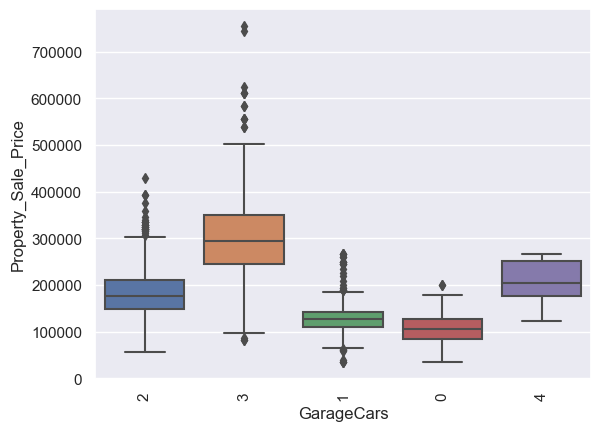

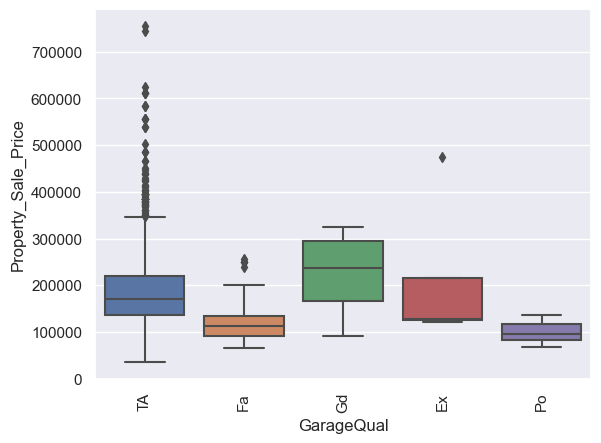

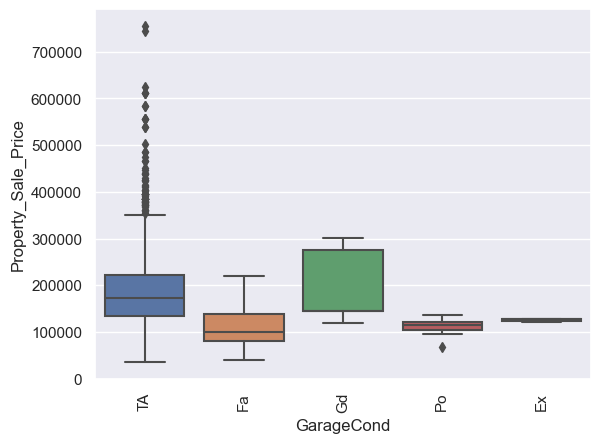

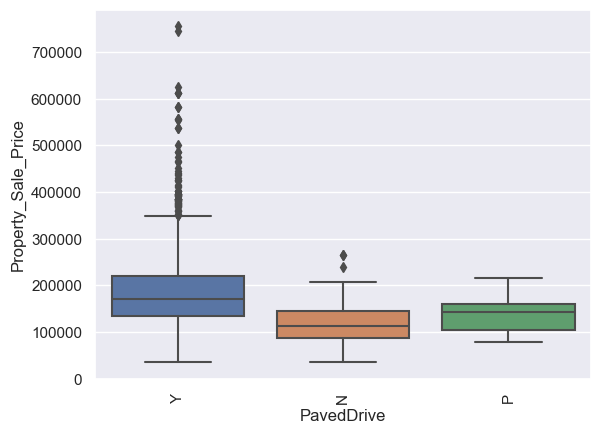

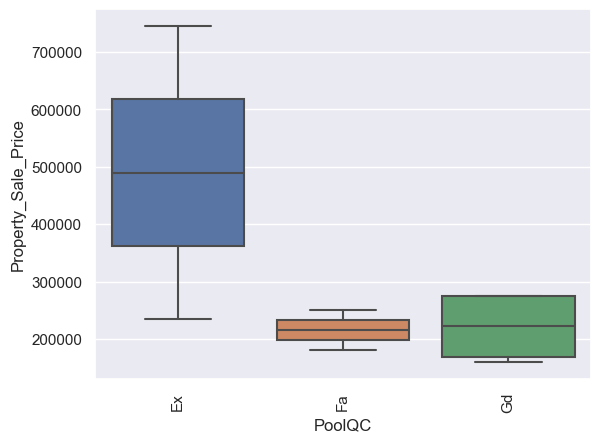

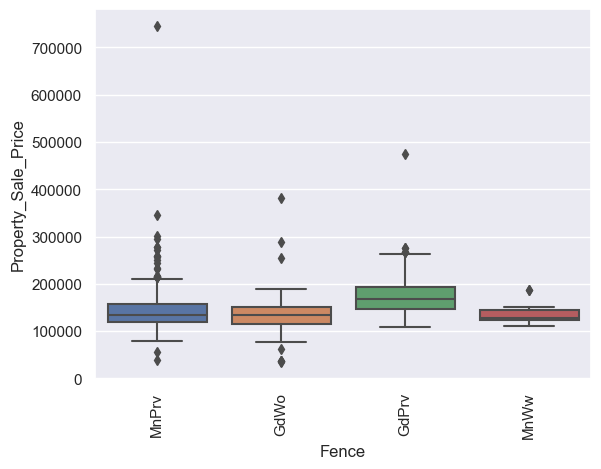

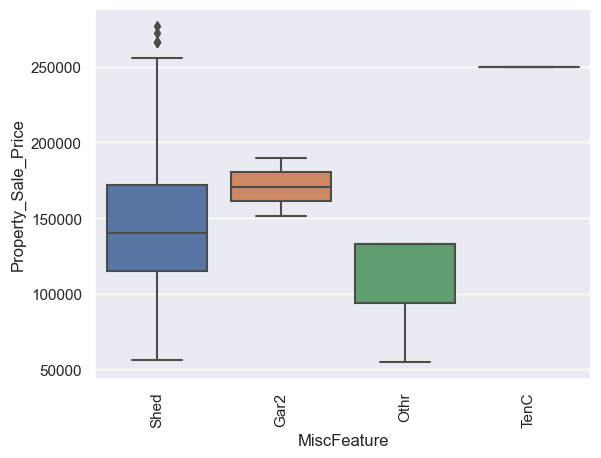

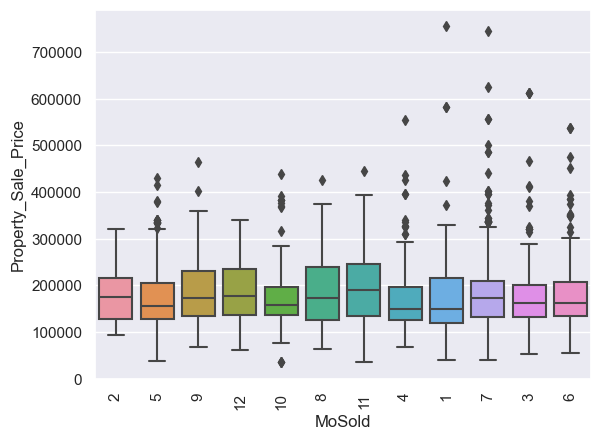

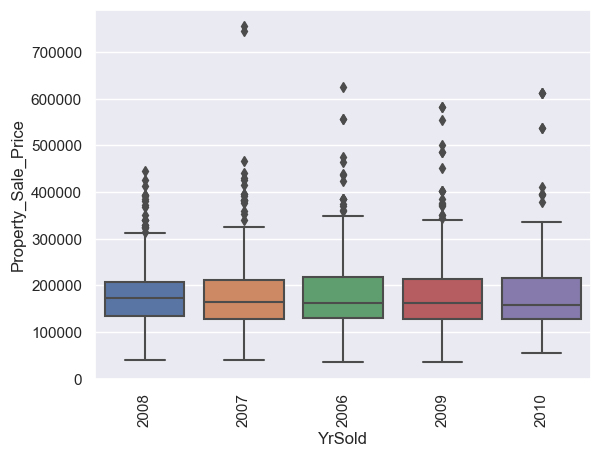

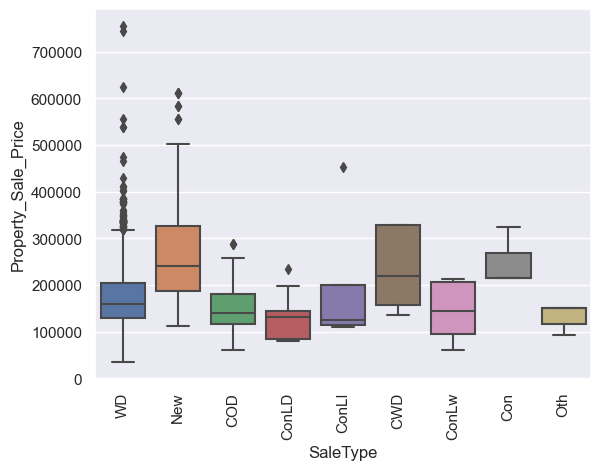

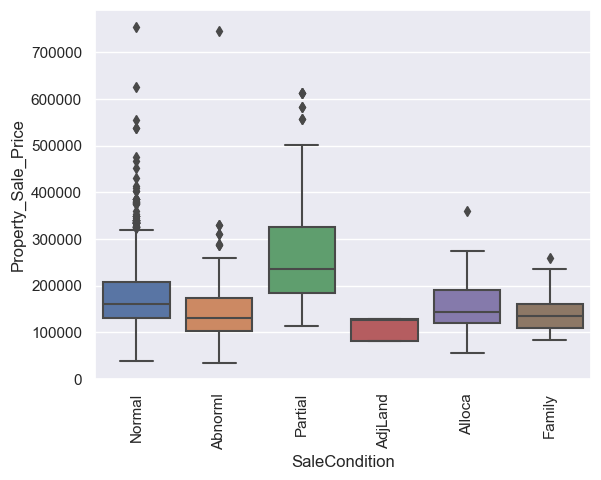

In [37]:
for i in categorical_column1.columns:
    sns.boxplot(x=i,y='Property_Sale_Price',data=df)
    plt.xticks(rotation=90)
    plt.show()

Observations:

    1.Above boxPlots will be helpful to determine(understand) which predictor variable(Categorical variable) has a relationship with response variable
    
    2.It also helps us to determine that the data as outliers

### Correlation matrix (heatmap style)

<AxesSubplot: >

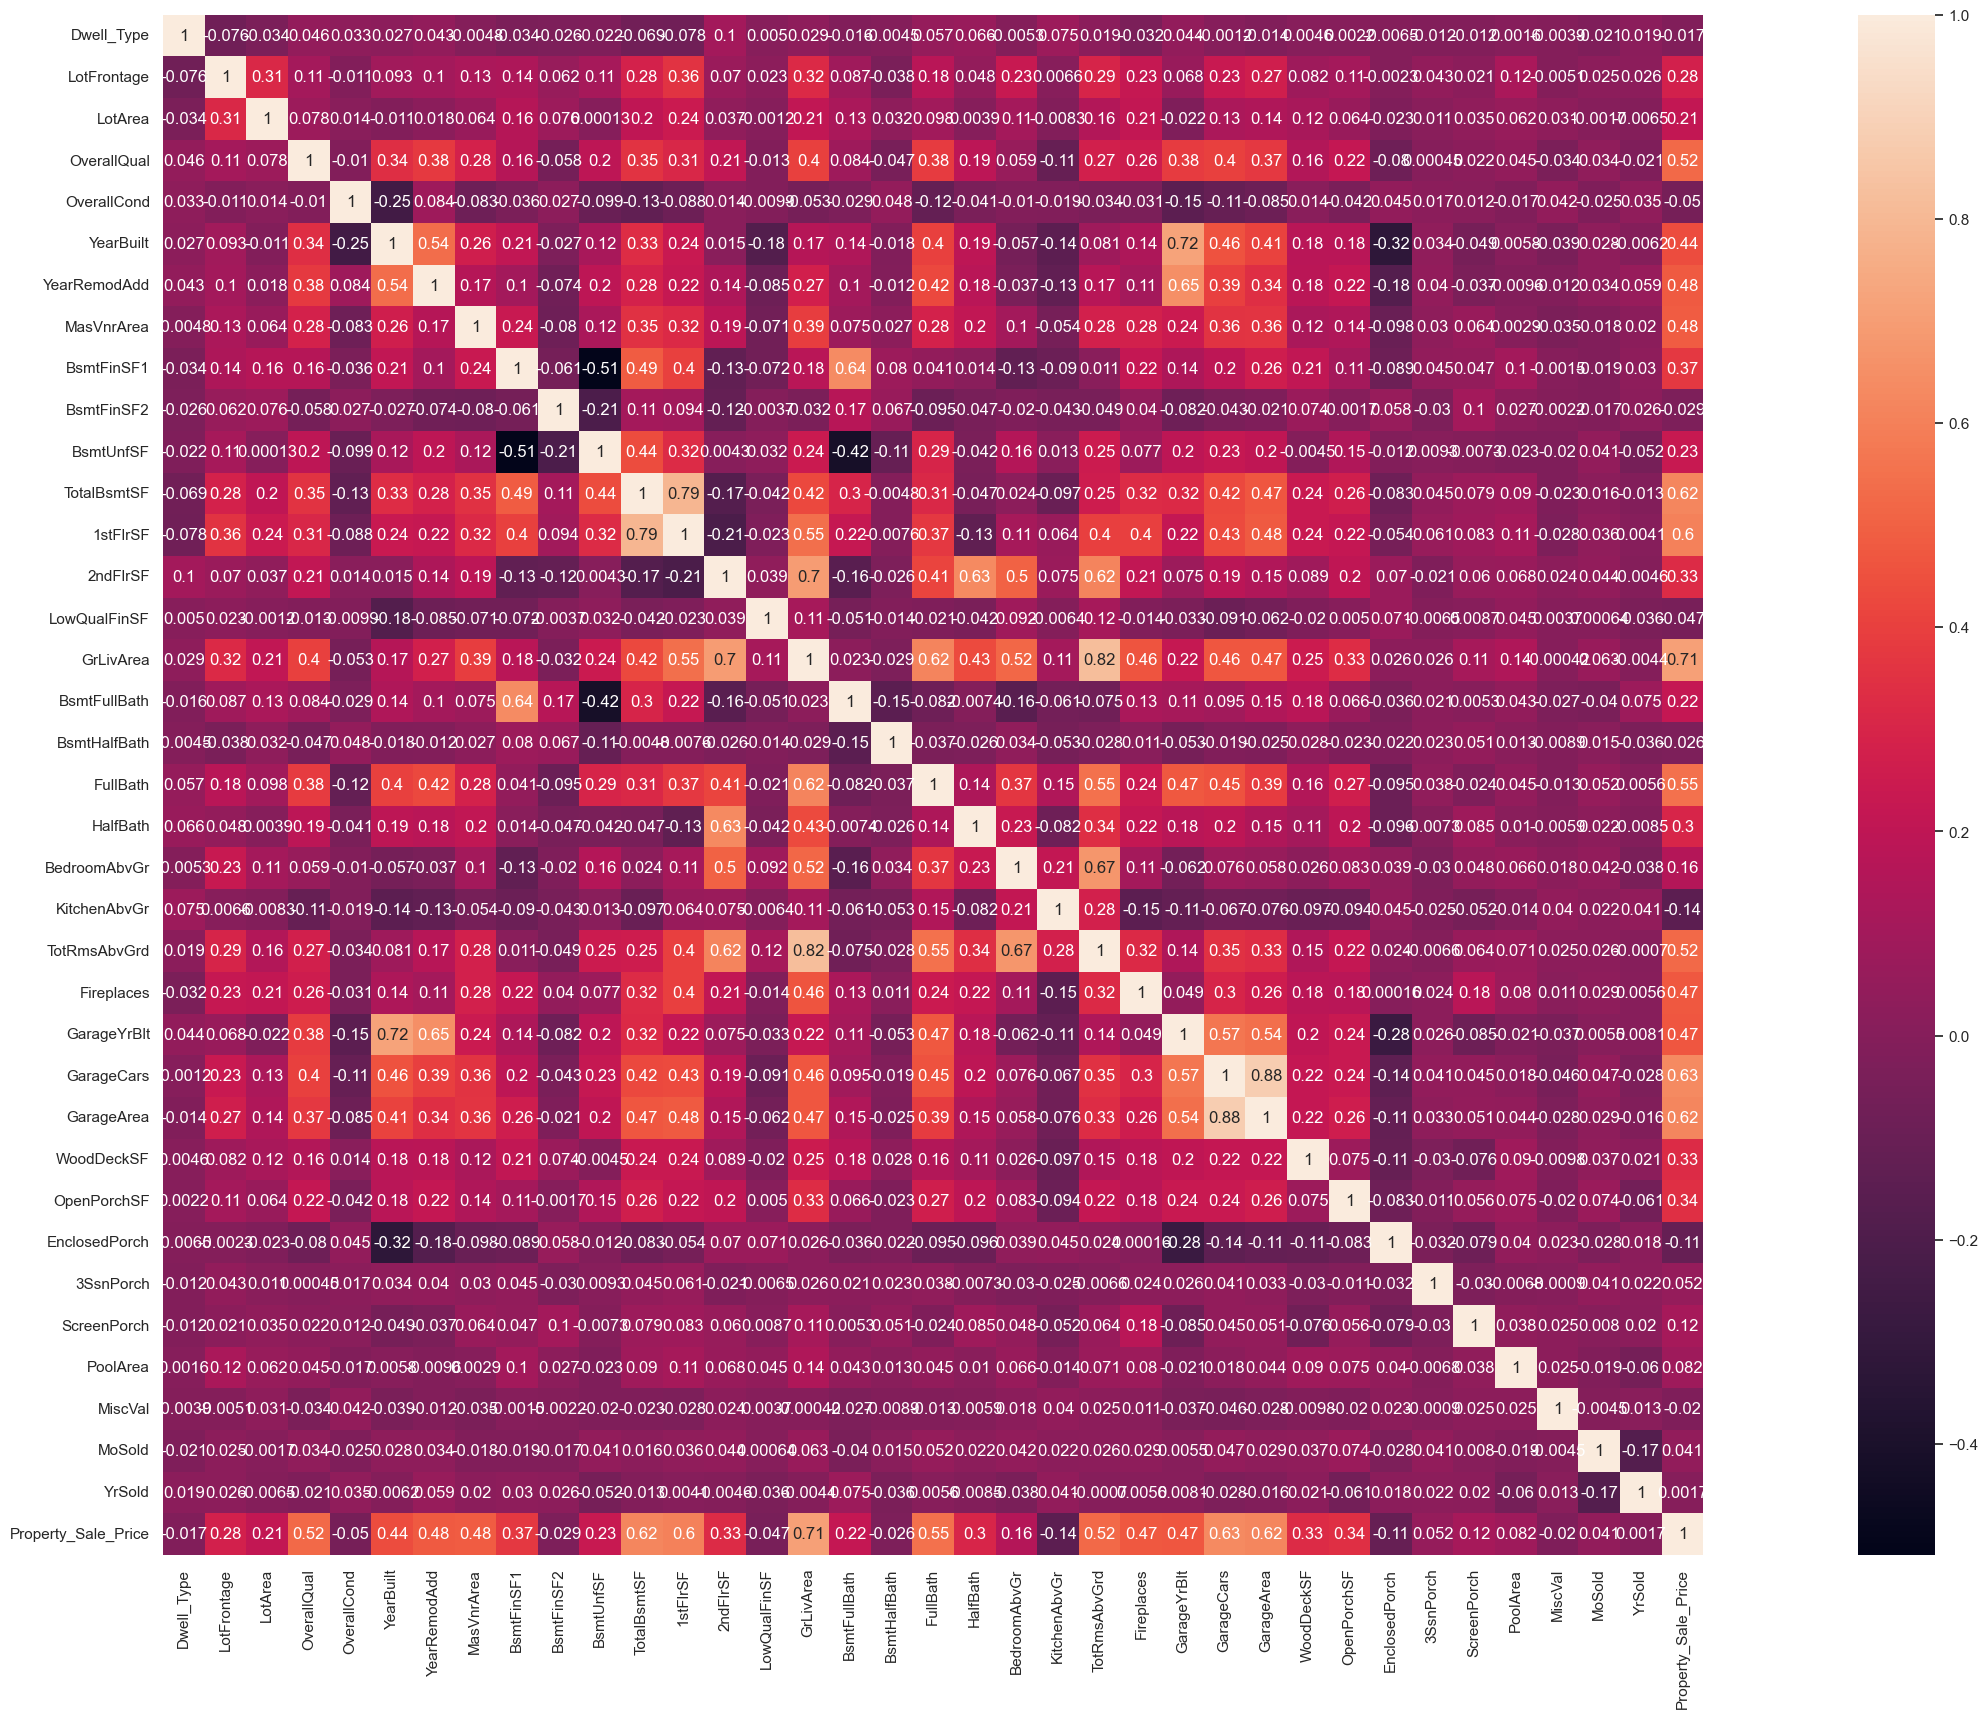

In [21]:
plt.figure(figsize=(40,20))
sns.set(font_scale=1)
sns.heatmap(df.corr(),annot=True,square=True)

<AxesSubplot: >

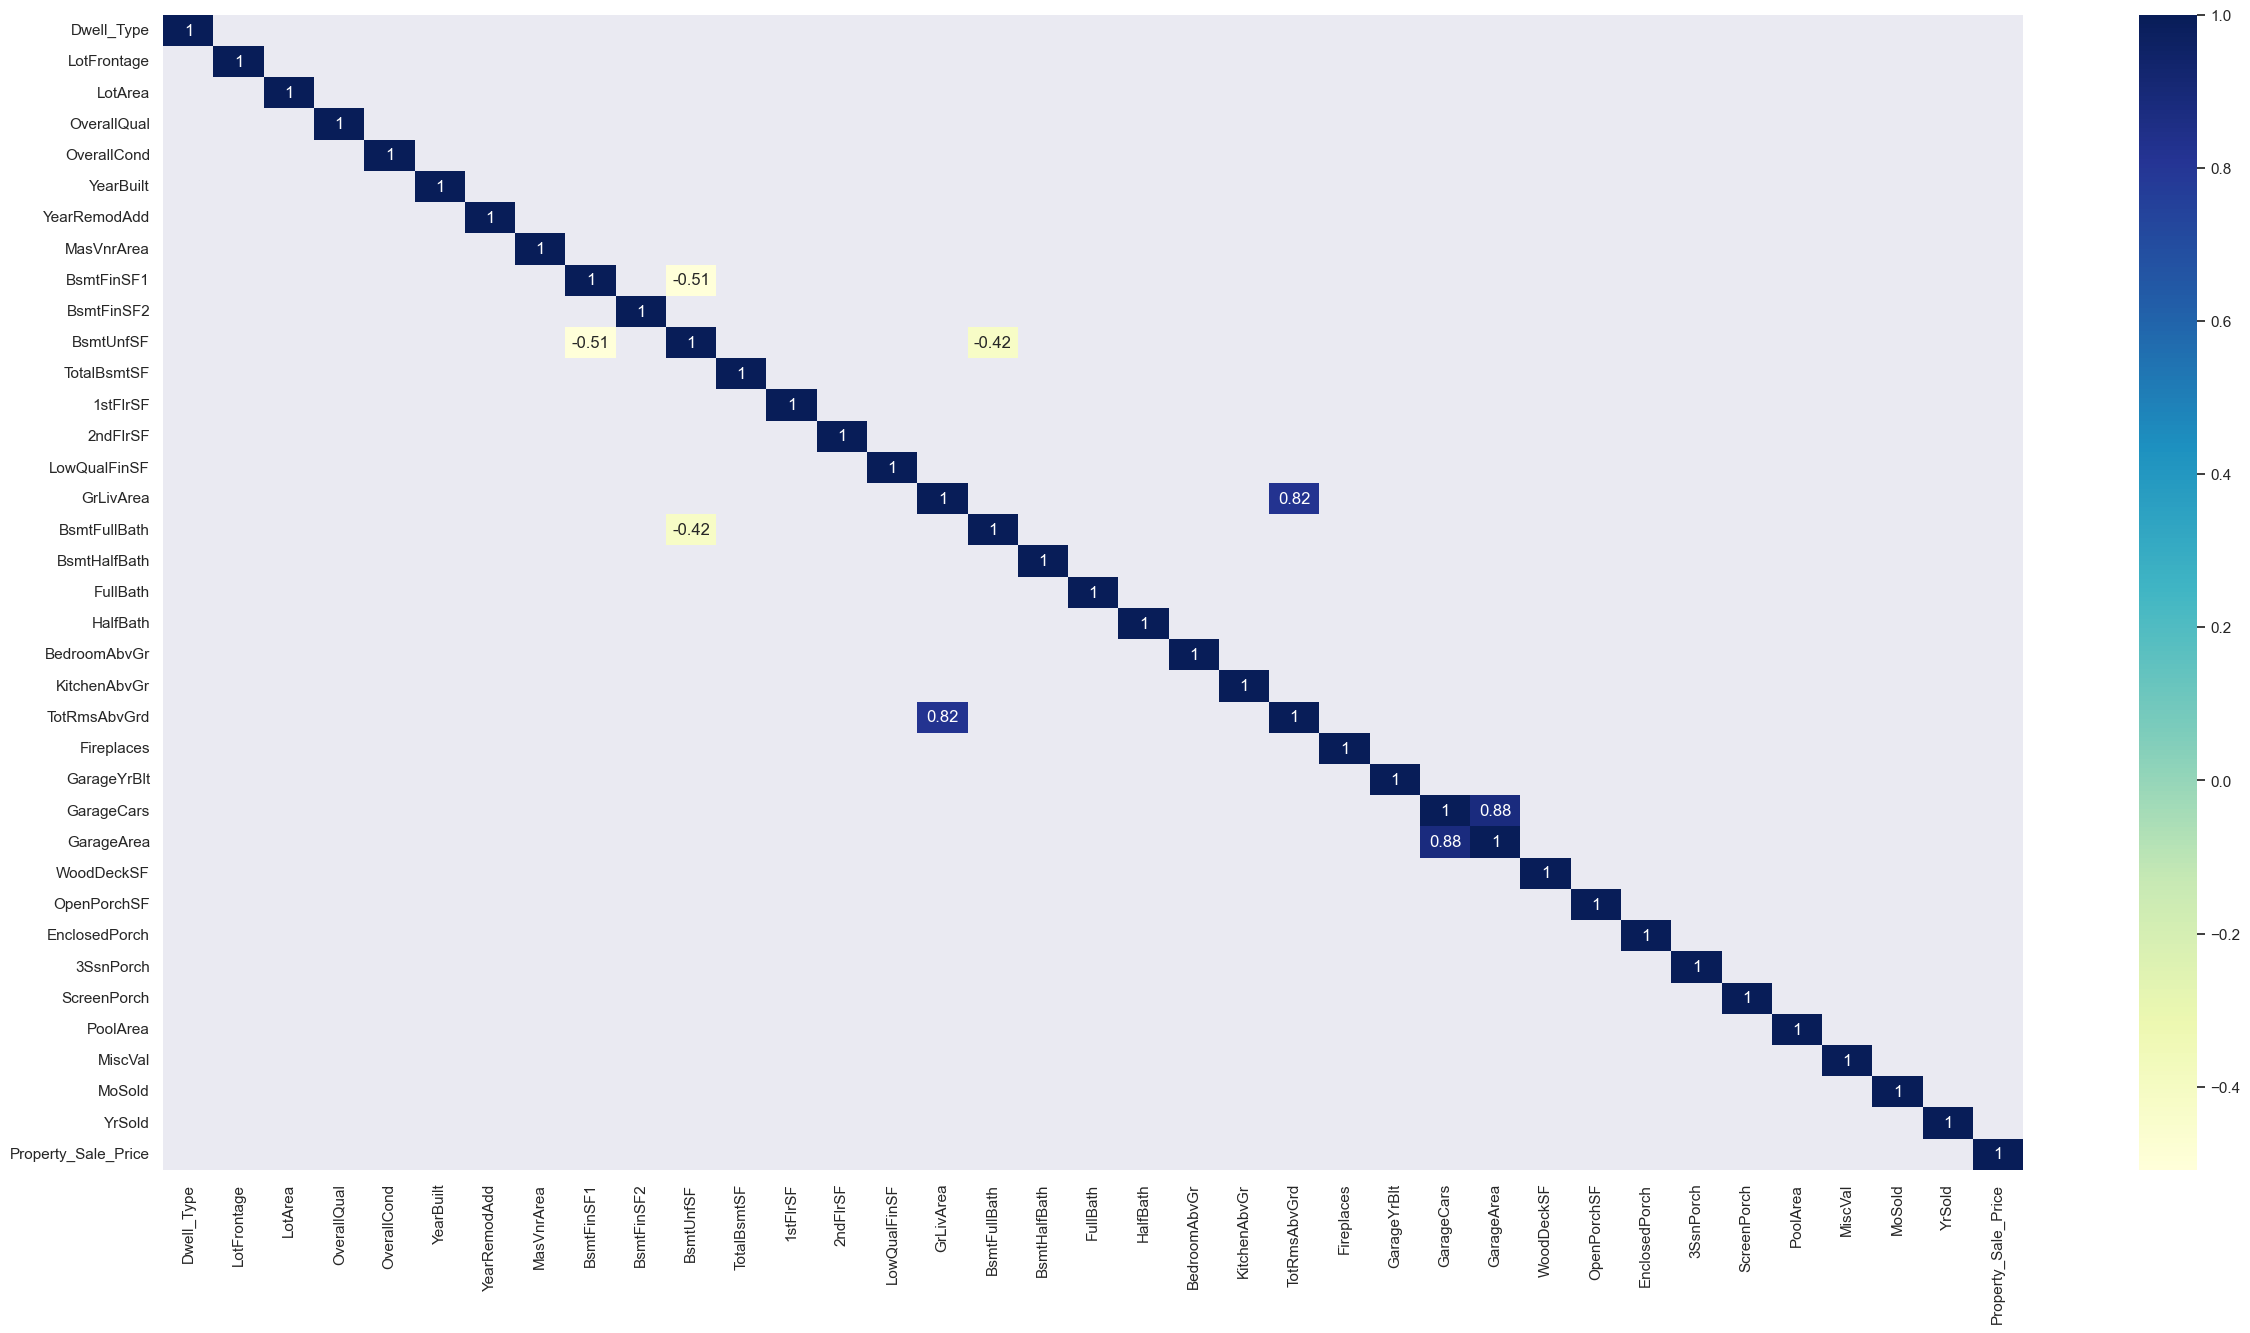

In [22]:
plt.figure(figsize=(30, 15))

sns.heatmap(df.corr()[(df.corr() >= 0.8) | (df.corr() <= -0.4)],cmap='YlGnBu',annot=True)

Observations:

    1.From the above heatmap we can conclude that there is a Positive correlation betweeen
        i.GarageCars and GarageArea,
        ii.GrLivArea and TotRmsAbvGrd
     
    2.Also we can determine that there is Negative correlation betweeen
        i.BsmtUnfSF and BsmtFinSF1
        ii.BsmtUnfSF and BsmtFullBath
        
    3.This Heatmap also tells us that Multicollinearity exists in this Dataset

### Scatter plots between 'Property_Sale_Price' and correlated variables

In [23]:
cols=['Property_Sale_Price','GarageCars','GarageArea','GrLivArea','TotRmsAbvGrd','BsmtUnfSF','BsmtFinSF1','BsmtFullBath']

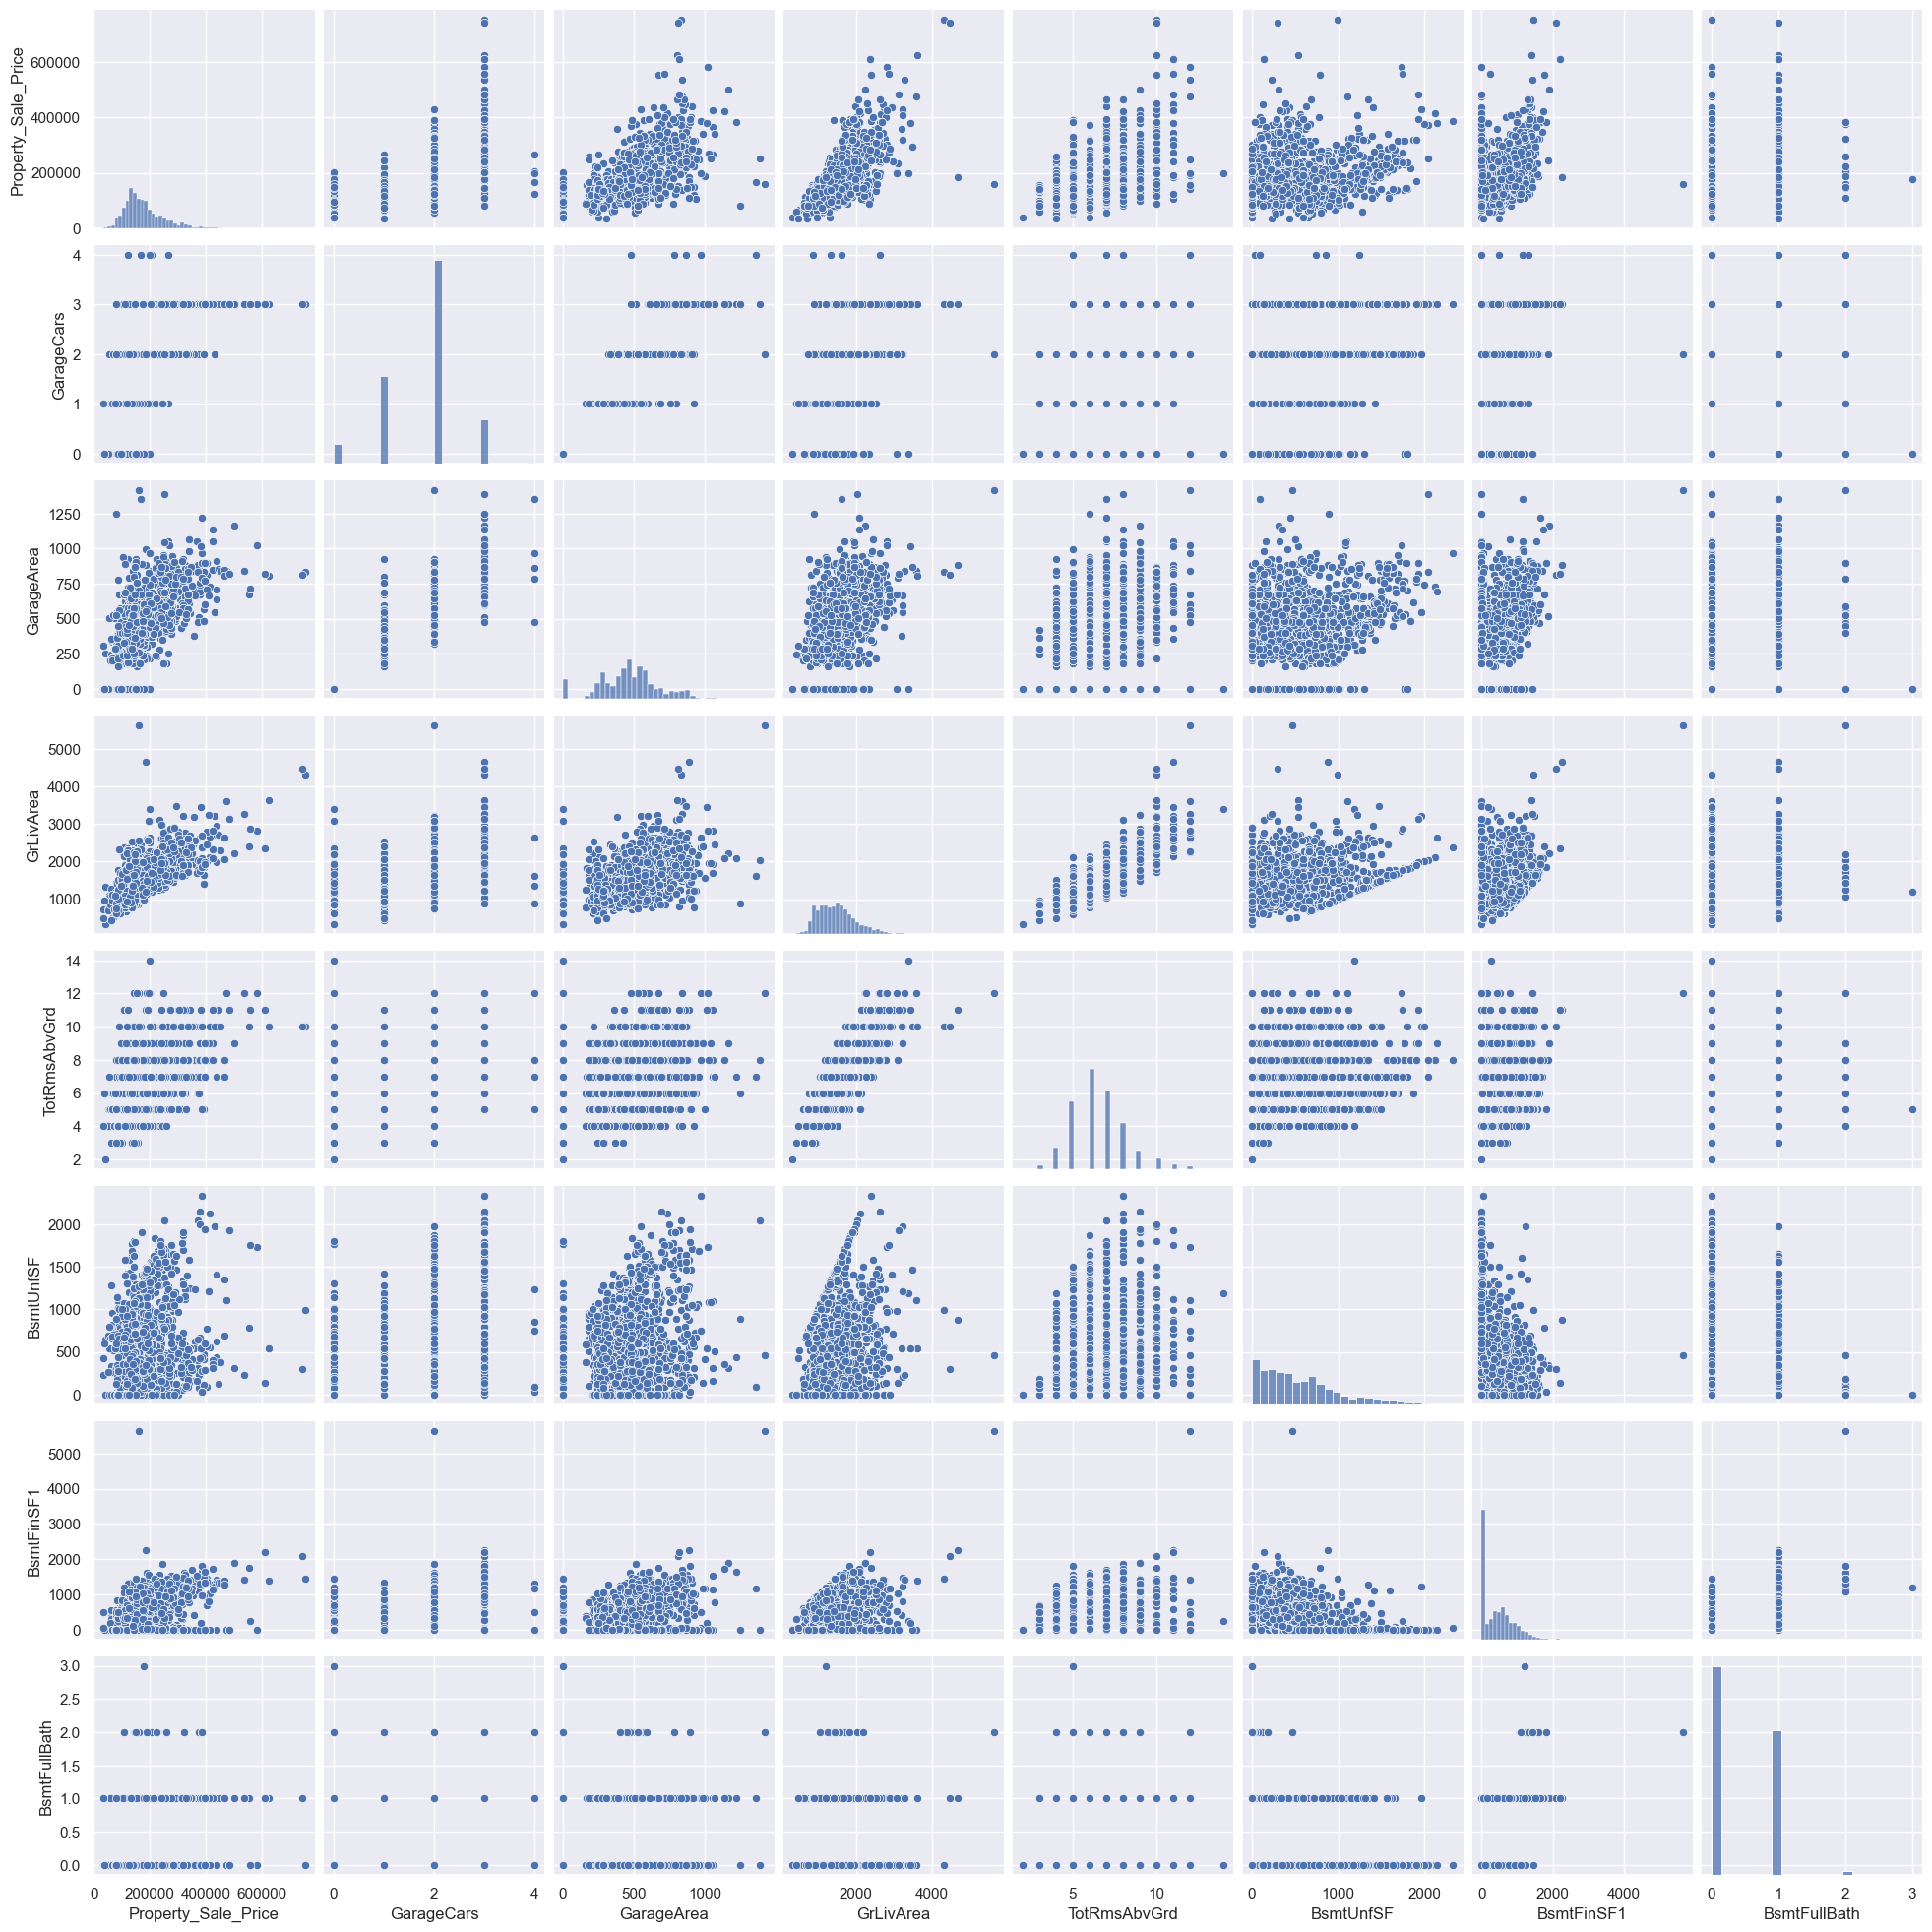

In [24]:
sns.pairplot(df[cols])

Observations:

    1.from the figure between 'Property_Sale_Price' and 'GrLivArea' ,it is observed that they have a positive linear realtionship,where if one variable increases the other variable also increases

<AxesSubplot: xlabel='Property_Sale_Price', ylabel='YearBuilt'>

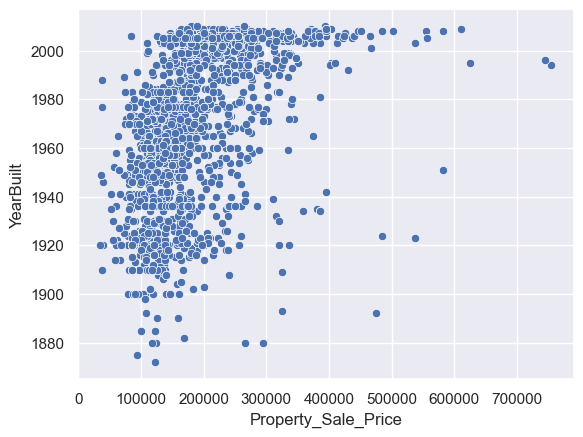

In [25]:
sns.scatterplot(y='YearBuilt',x='Property_Sale_Price',data=df)

Observations:

    1.From the above Scatterplot its observed that Prices are increasing rapidly from year 2000

### Missing Values

<AxesSubplot: >

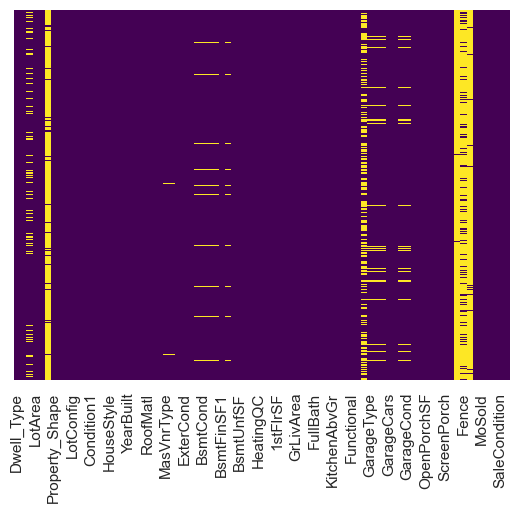

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
t=df.isnull().sum()
p=df.isnull().sum()/df.shape[0]*100

In [28]:
missing_data=pd.concat([t,p],axis=1,keys=['sum','percentage'])

In [29]:
missing_data.sort_values(by='sum',ascending=False)

sum  percentage
PoolQC               2065   99.614086
MiscFeature          1993   96.140859
Alley                1944   93.777135
Fence                1669   80.511336
FireplaceQu           988   47.660396
LotFrontage           320   15.436565
GarageYrBlt           113    5.451037
GarageCond            113    5.451037
GarageType            113    5.451037
GarageFinish          113    5.451037
GarageQual            113    5.451037
BsmtExposure           61    2.942595
BsmtFinType2           60    2.894356
BsmtCond               59    2.846117
BsmtQual               59    2.846117
BsmtFinType1           59    2.846117
MasVnrArea             14    0.675350
MasVnrType             14    0.675350
Electrical              1    0.048239
Dwell_Type              0    0.000000
Fireplaces              0    0.000000
Functional              0    0.000000
KitchenQual             0    0.000000
KitchenAbvGr            0    0.000000
BedroomAbvGr            0    0.000000
HalfBath                0    0.000000
FullBath                0    0.000000
BsmtHalfBath            0    0.000000
TotRmsAbvGrd            0    0.000000
GarageCars              0    0.000000
GrLivArea               0    0.000000
GarageArea              0    0.000000
PavedDrive              0    0.000000
WoodDeckSF              0    0.000000
OpenPorchSF             0    0.000000
EnclosedPorch           0    0.000000
3SsnPorch               0    0.000000
ScreenPorch             0    0.000000
PoolArea                0    0.000000
MiscVal                 0    0.000000
MoSold                  0    0.000000
YrSold                  0    0.000000
SaleType                0    0.000000
SaleCondition           0    0.000000
BsmtFullBath            0    0.000000
CentralAir              0    0.000000
LowQualFinSF            0    0.000000
Neighborhood            0    0.000000
OverallCond             0    0.000000
OverallQual             0    0.000000
HouseStyle              0    0.000000
Dwelling_Type           0    0.000000
Condition2              0    0.000000
Condition1              0    0.000000
LandSlope               0    0.000000
2ndFlrSF                0    0.000000
LotConfig               0    0.000000
Utilities               0    0.000000
LandContour             0    0.000000
Property_Shape          0    0.000000
Road_Type               0    0.000000
LotArea                 0    0.000000
YearBuilt               0    0.000000
YearRemodAdd            0    0.000000
RoofStyle               0    0.000000
RoofMatl                0    0.000000
Exterior1st             0    0.000000
Exterior2nd             0    0.000000
ExterQual               0    0.000000
ExterCond               0    0.000000
Foundation              0    0.000000
BsmtFinSF1              0    0.000000
BsmtFinSF2              0    0.000000
BsmtUnfSF               0    0.000000
TotalBsmtSF             0    0.000000
Heating                 0    0.000000
HeatingQC               0    0.000000
Zone_Class              0    0.000000
1stFlrSF                0    0.000000
Property_Sale_Price     0    0.000000

Observations:

    1.We will be deleting all columns with missing values above 25%
    
    2.Since Electrical column is categorical and is just missing one value , the missing value row can be removed or can be filled with mode
    
    3.Data description says NA in PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageCond,GarageYrBlt,GarageType,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinType1,MasVnrArea,MasVnrType means the features are not available in House
    so None can be filled for columns with Object datatype and 0 for columns with int or float datatype

### Outliers

In [30]:
def Outliers(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    innerfence=q1-(1.5*iqr)
    outerfence=q3+(1.5*iqr)
    
    outliers=[]
    outliers_index=[]
    for i,j in enumerate(x):
        if (j<innerfence) | (j>outerfence):
            outliers.append(j)
            outliers_index.append(i)
    print('Outliers=',outliers,'\n')
    print('Outliers_index=',outliers_index)
    return (px.box(x))

In [31]:
Outliers(df['Property_Sale_Price'])

Outliers= [345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000, 556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 410000, 466500, 377500, 394617, 385000, 383970, 383970, 385000, 394617, 385000, 341000, 538000, 395000, 485000, 582933, 350000, 611657, 395192, 348000, 556581, 611657] 

Outliers_index= [11, 53, 58, 112, 151, 161, 178, 185, 224, 231, 278, 309, 313, 320, 321, 336, 349, 378, 389, 440, 473, 477, 481, 496, 515, 527, 585, 591, 608, 642, 644, 654, 661, 664, 678, 688, 691, 702, 718, 769, 774, 798, 803, 825, 877, 898, 987, 990, 1046, 1142, 1169, 1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388, 1437, 1471, 1573, 1580, 1597, 1653, 1

Observations:

    1.From the above Output ,we now know the outlier values and their index of the dependent variable